In [1]:
# Import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer,enable_hist_gradient_boosting
from sklearn.impute import IterativeImputer,SimpleImputer
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import (LogisticRegression, RidgeClassifier,
                                 PassiveAggressiveClassifier, SGDClassifier)
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                            AdaBoostClassifier, ExtraTreesClassifier,
                            BaggingClassifier, VotingClassifier,
                            StackingClassifier, HistGradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.discriminant_analysis import (QuadraticDiscriminantAnalysis,
                                          LinearDiscriminantAnalysis)
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.calibration import CalibratedClassifierCV
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.base import clone
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
import gc

c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


### Load Data

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160 entries, 0 to 1159
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        1160 non-null   object 
 1   Current Position          1019 non-null   object 
 2   Targeted Position         202 non-null    object 
 3   Total Working Experience  1160 non-null   int64  
 4   Candidate Level           1160 non-null   object 
 5   Domisili                  1061 non-null   object 
 6   Education 1               1142 non-null   object 
 7   Education 2               531 non-null    object 
 8   Education 3               129 non-null    object 
 9   Expected Benefit Botom    1160 non-null   int64  
 10  Expected Benefit Up       1160 non-null   int64  
 11  Notice Period             57 non-null     object 
 12  Tech Stack                1155 non-null   object 
 13  Certification             801 non-null    object 
 14  Estimate

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        290 non-null    object
 1   Current Position          255 non-null    object
 2   Targeted Position         42 non-null     object
 3   Total Working Experience  290 non-null    int64 
 4   Candidate Level           290 non-null    object
 5   Domisili                  270 non-null    object
 6   Education 1               284 non-null    object
 7   Education 2               124 non-null    object
 8   Education 3               31 non-null     object
 9   Expected Benefit Botom    290 non-null    int64 
 10  Expected Benefit Up       290 non-null    int64 
 11  Notice Period             9 non-null      object
 12  Tech Stack                290 non-null    object
 13  Certification             216 non-null    object
dtypes: int64(3), object(11)
me

=== DATASET OVERVIEW ===
Training data shape: (1160, 16)
Test data shape: (290, 14)

NULL VALUE ANALYSIS - TRAINING SET

📊 NULL VALUE SUMMARY:
Total columns: 16
Columns with nulls: 9
Columns without nulls: 7

🎯 SEVERITY BREAKDOWN:
   ✅ No Nulls: 7 columns
   🔴 Critical (>50%): 4 columns
   🟠 Medium (5-20%): 2 columns
   🟢 Low (<5%): 2 columns
   🟡 High (20-50%): 1 columns

📋 DETAILED NULL ANALYSIS:
                  Column  Null_Count  Null_Percentage          Severity Data_Type
           Notice Period        1103            95.09 🔴 Critical (>50%)    object
             Education 3        1031            88.88 🔴 Critical (>50%)    object
       Targeted Position         958            82.59 🔴 Critical (>50%)    object
             Education 2         629            54.22 🔴 Critical (>50%)    object
           Certification         359            30.95   🟡 High (20-50%)    object
        Current Position         141            12.16  🟠 Medium (5-20%)    object
                Domisili

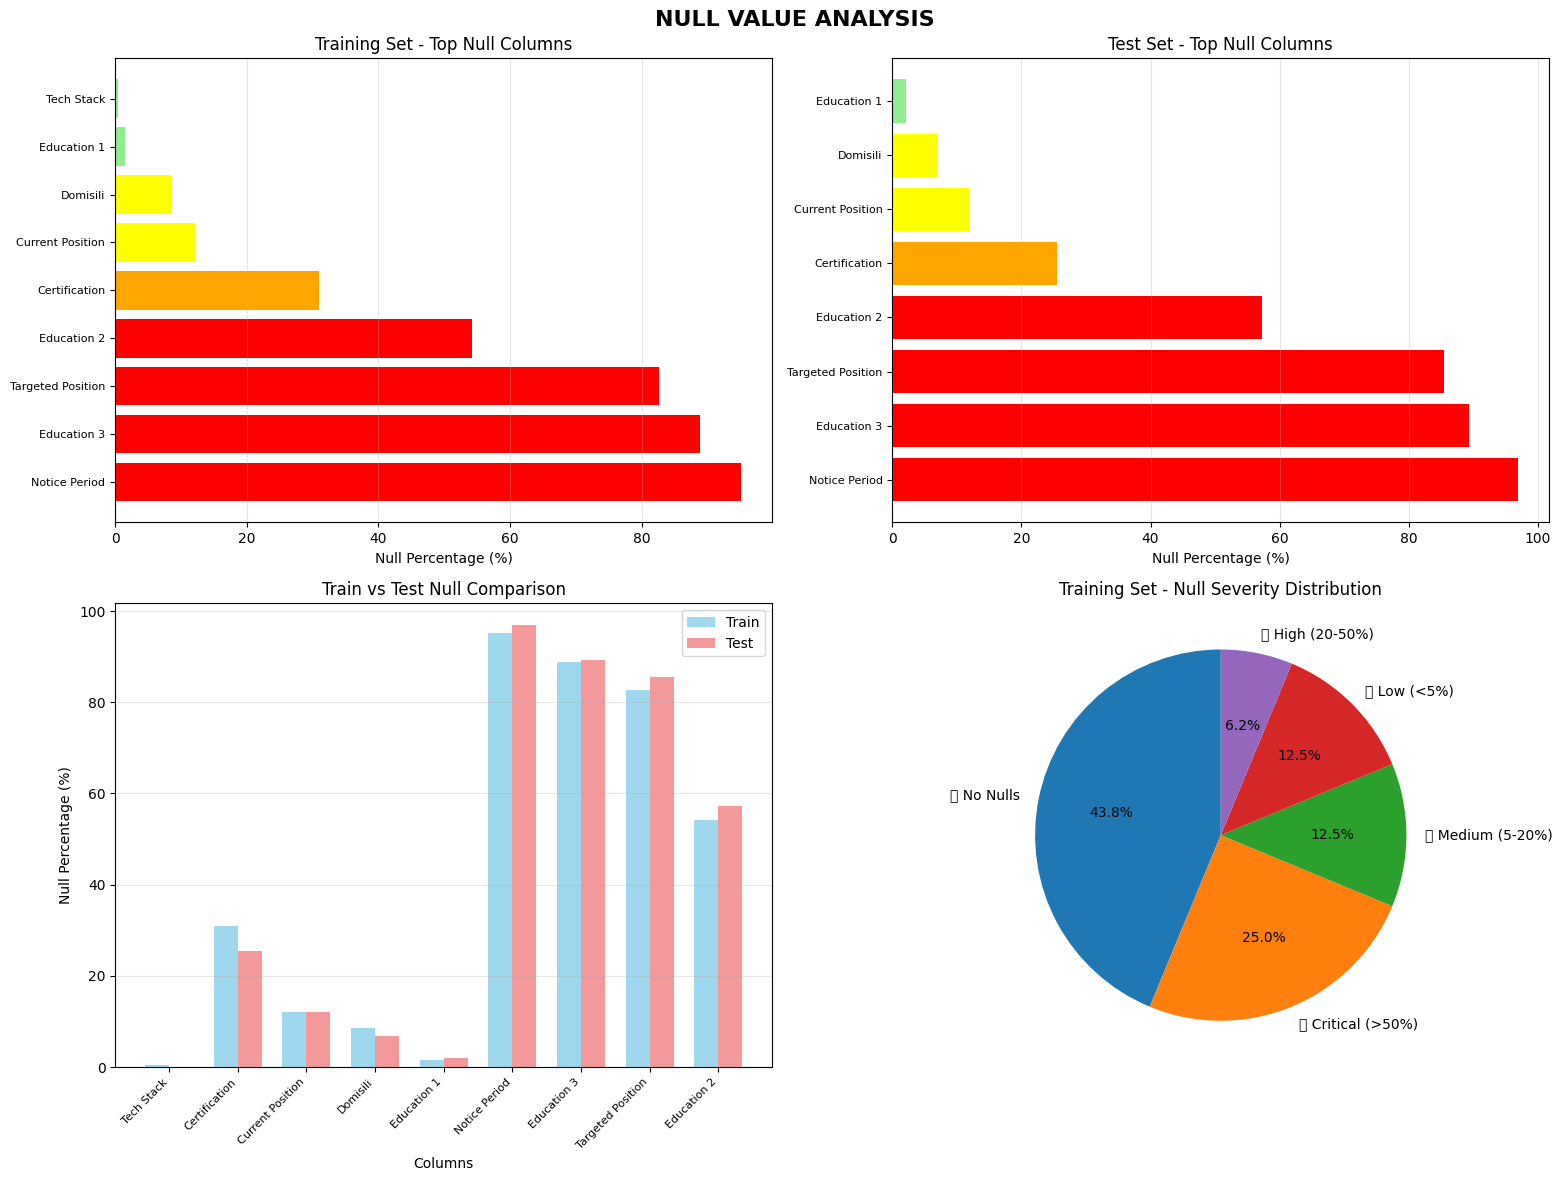


🎯 ACTIONABLE RECOMMENDATIONS

🔴 CRITICAL COLUMNS (>50% nulls) - CONSIDER DROPPING:
   • Notice Period: 95.1% nulls
   • Education 3: 88.9% nulls
   • Targeted Position: 82.6% nulls
   • Education 2: 54.2% nulls

🟡 MEDIUM NULL COLUMNS (5-50%) - NEED IMPUTATION:
   • Certification: 30.9% nulls → Mode/Category imputation
   • Current Position: 12.2% nulls → Mode/Category imputation
   • Domisili: 8.5% nulls → Mode/Category imputation

✅ READY-TO-USE COLUMNS (No nulls): 7 columns
   ID, Total Working Experience, Candidate Level, Expected Benefit Botom, Expected Benefit Up, Estimate Bottom, Estimate Up

💡 NEXT STEPS:
   1. Drop critical null columns (>50%)
   2. Plan imputation strategy for medium null columns
   3. Focus feature engineering on perfect columns
   4. Check if test set has same null patterns


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print("=== DATASET OVERVIEW ===")
print(f"Training data shape: {df.shape}")
print(f"Test data shape: {df_test.shape}")

# =========================================
# NULL VALUE ANALYSIS
# =========================================

def analyze_null_values(data, dataset_name):
    """Comprehensive null value analysis"""
    print(f"\n{'='*50}")
    print(f"NULL VALUE ANALYSIS - {dataset_name}")
    print(f"{'='*50}")
    
    # Calculate null counts and percentages
    null_info = pd.DataFrame({
        'Column': data.columns,
        'Null_Count': data.isnull().sum(),
        'Null_Percentage': (data.isnull().sum() / len(data)) * 100,
        'Data_Type': data.dtypes,
        'Non_Null_Count': data.notnull().sum()
    })
    
    # Sort by null percentage (descending)
    null_info = null_info.sort_values('Null_Percentage', ascending=False)
    
    # Add null severity categories
    null_info['Severity'] = null_info['Null_Percentage'].apply(
        lambda x: '🔴 Critical (>50%)' if x > 50 
        else '🟡 High (20-50%)' if x > 20
        else '🟠 Medium (5-20%)' if x > 5
        else '🟢 Low (<5%)' if x > 0
        else '✅ No Nulls'
    )
    
    print(f"\n📊 NULL VALUE SUMMARY:")
    print(f"Total columns: {len(data.columns)}")
    print(f"Columns with nulls: {(null_info['Null_Count'] > 0).sum()}")
    print(f"Columns without nulls: {(null_info['Null_Count'] == 0).sum()}")
    
    # Show severity breakdown
    severity_counts = null_info['Severity'].value_counts()
    print(f"\n🎯 SEVERITY BREAKDOWN:")
    for severity, count in severity_counts.items():
        print(f"   {severity}: {count} columns")
    
    # Display detailed table
    print(f"\n📋 DETAILED NULL ANALYSIS:")
    display_cols = ['Column', 'Null_Count', 'Null_Percentage', 'Severity', 'Data_Type']
    print(null_info[display_cols].to_string(index=False, float_format='%.2f'))
    
    # High null columns (>20%)
    high_null_cols = null_info[null_info['Null_Percentage'] > 20]
    if len(high_null_cols) > 0:
        print(f"\n⚠️  HIGH NULL COLUMNS (>20%):")
        for _, row in high_null_cols.iterrows():
            print(f"   • {row['Column']}: {row['Null_Percentage']:.1f}% ({row['Null_Count']:,} nulls)")
    
    # Perfect columns (no nulls)
    perfect_cols = null_info[null_info['Null_Count'] == 0]
    if len(perfect_cols) > 0:
        print(f"\n✅ PERFECT COLUMNS (No Nulls):")
        for _, row in perfect_cols.iterrows():
            print(f"   • {row['Column']} ({row['Data_Type']})")
    
    return null_info

# Analyze both datasets
train_null_info = analyze_null_values(df, "TRAINING SET")
test_null_info = analyze_null_values(df_test, "TEST SET")

# =========================================
# VISUAL NULL ANALYSIS
# =========================================

def plot_null_analysis(train_info, test_info):
    """Create visualizations for null value analysis"""
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('NULL VALUE ANALYSIS', fontsize=16, fontweight='bold')
    
    # 1. Training set null percentage bar chart
    train_nulls = train_info[train_info['Null_Percentage'] > 0].head(15)
    if len(train_nulls) > 0:
        axes[0, 0].barh(range(len(train_nulls)), train_nulls['Null_Percentage'], 
                       color=['red' if x > 50 else 'orange' if x > 20 else 'yellow' if x > 5 else 'lightgreen' 
                             for x in train_nulls['Null_Percentage']])
        axes[0, 0].set_yticks(range(len(train_nulls)))
        axes[0, 0].set_yticklabels(train_nulls['Column'], fontsize=8)
        axes[0, 0].set_xlabel('Null Percentage (%)')
        axes[0, 0].set_title('Training Set - Top Null Columns')
        axes[0, 0].grid(axis='x', alpha=0.3)
    
    # 2. Test set null percentage bar chart  
    test_nulls = test_info[test_info['Null_Percentage'] > 0].head(15)
    if len(test_nulls) > 0:
        axes[0, 1].barh(range(len(test_nulls)), test_nulls['Null_Percentage'],
                       color=['red' if x > 50 else 'orange' if x > 20 else 'yellow' if x > 5 else 'lightgreen' 
                             for x in test_nulls['Null_Percentage']])
        axes[0, 1].set_yticks(range(len(test_nulls)))
        axes[0, 1].set_yticklabels(test_nulls['Column'], fontsize=8)
        axes[0, 1].set_xlabel('Null Percentage (%)')
        axes[0, 1].set_title('Test Set - Top Null Columns')
        axes[0, 1].grid(axis='x', alpha=0.3)
    
    # 3. Comparison between train and test
    common_cols = set(train_info['Column']) & set(test_info['Column'])
    if common_cols:
        comparison_data = []
        for col in common_cols:
            train_pct = train_info[train_info['Column'] == col]['Null_Percentage'].iloc[0]
            test_pct = test_info[test_info['Column'] == col]['Null_Percentage'].iloc[0]
            if train_pct > 0 or test_pct > 0:  # Only show columns with nulls
                comparison_data.append({'Column': col, 'Train': train_pct, 'Test': test_pct})
        
        if comparison_data:
            comp_df = pd.DataFrame(comparison_data).head(10)
            x = range(len(comp_df))
            width = 0.35
            axes[1, 0].bar([i - width/2 for i in x], comp_df['Train'], width, label='Train', alpha=0.8, color='skyblue')
            axes[1, 0].bar([i + width/2 for i in x], comp_df['Test'], width, label='Test', alpha=0.8, color='lightcoral')
            axes[1, 0].set_xlabel('Columns')
            axes[1, 0].set_ylabel('Null Percentage (%)')
            axes[1, 0].set_title('Train vs Test Null Comparison')
            axes[1, 0].set_xticks(x)
            axes[1, 0].set_xticklabels(comp_df['Column'], rotation=45, ha='right', fontsize=8)
            axes[1, 0].legend()
            axes[1, 0].grid(axis='y', alpha=0.3)
    
    # 4. Null severity distribution
    train_severity = train_info['Severity'].value_counts()
    test_severity = test_info['Severity'].value_counts()
    
    # Pie chart for train severity
    axes[1, 1].pie(train_severity.values, labels=train_severity.index, autopct='%1.1f%%', startangle=90)
    axes[1, 1].set_title('Training Set - Null Severity Distribution')
    
    plt.tight_layout()
    plt.show()

# Create visualizations
plot_null_analysis(train_null_info, test_null_info)

# =========================================
# ACTIONABLE RECOMMENDATIONS
# =========================================

print(f"\n{'='*60}")
print("🎯 ACTIONABLE RECOMMENDATIONS")
print(f"{'='*60}")

# High null columns
high_null_train = train_null_info[train_null_info['Null_Percentage'] > 50]
high_null_test = test_null_info[test_null_info['Null_Percentage'] > 50]

if len(high_null_train) > 0:
    print(f"\n🔴 CRITICAL COLUMNS (>50% nulls) - CONSIDER DROPPING:")
    for _, row in high_null_train.iterrows():
        print(f"   • {row['Column']}: {row['Null_Percentage']:.1f}% nulls")

# Medium null columns  
medium_null_train = train_null_info[
    (train_null_info['Null_Percentage'] > 5) & 
    (train_null_info['Null_Percentage'] <= 50)
]

if len(medium_null_train) > 0:
    print(f"\n🟡 MEDIUM NULL COLUMNS (5-50%) - NEED IMPUTATION:")
    for _, row in medium_null_train.iterrows():
        dtype = str(row['Data_Type'])
        if 'object' in dtype:
            strategy = "Mode/Category imputation"
        elif 'int' in dtype or 'float' in dtype:
            strategy = "Mean/Median imputation"
        else:
            strategy = "Custom strategy needed"
        print(f"   • {row['Column']}: {row['Null_Percentage']:.1f}% nulls → {strategy}")

# Perfect columns
perfect_train = train_null_info[train_null_info['Null_Count'] == 0]
if len(perfect_train) > 0:
    print(f"\n✅ READY-TO-USE COLUMNS (No nulls): {len(perfect_train)} columns")
    print(f"   {', '.join(perfect_train['Column'].tolist())}")

print(f"\n💡 NEXT STEPS:")
print(f"   1. Drop critical null columns (>50%)")
print(f"   2. Plan imputation strategy for medium null columns")
print(f"   3. Focus feature engineering on perfect columns")
print(f"   4. Check if test set has same null patterns")

In [6]:
# Count null, calculate null percentage on each column
null_percentage = df.isnull().mean()
null_percentage = null_percentage.sort_values(ascending=False)

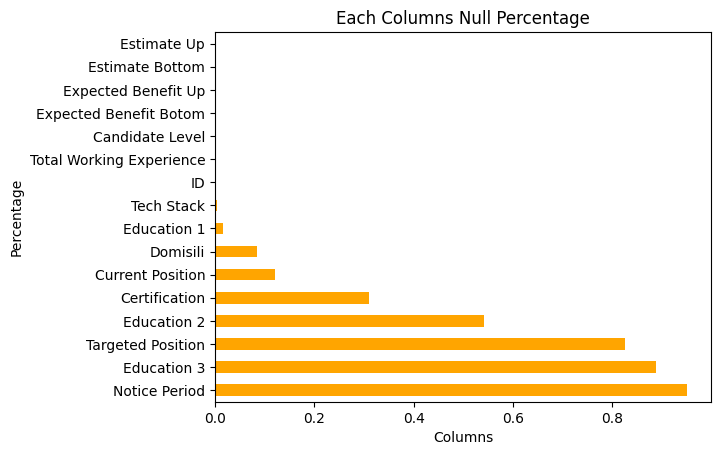

In [7]:
# Visualize
null_percentage.plot(kind='barh', color='orange')
plt.title("Each Columns Null Percentage")
plt.xlabel("Columns")
plt.ylabel("Percentage")
plt.show()

In [8]:
df_high_null = null_percentage[null_percentage > 0.1]
df_low_null = null_percentage[null_percentage <= 0.1]
print(len(df_high_null), len(df_low_null))
print(df_high_null)

6 10
Notice Period        0.950862
Education 3          0.888793
Targeted Position    0.825862
Education 2          0.542241
Certification        0.309483
Current Position     0.121552
dtype: float64


In [9]:
for column in df.columns:
    print(column)

ID
Current Position
Targeted Position
Total Working Experience
Candidate Level
Domisili
Education 1
Education 2
Education 3
Expected Benefit Botom
Expected Benefit Up
Notice Period
Tech Stack
Certification
Estimate Bottom
Estimate Up


To do:
1. Turn education 1-3 -> 0/1
2. Turn certification -> count
3. Turn current position -> 0/1
4. Turn tech stack -> sum
5. Turn notice period -> 1/0
6. Turn tech stack -> sum


In [10]:
# Classify education 1
# Turn education 2-3 -> 0/1
# df["Education 1"] = df["Education 1"].notnull().astype(int)

# sisa education aja yang di astype
columns_to_drop = ['Education 2','Education 3', 'Notice Period', 'Targeted Position']
print(f"=== DROPPING COLUMNS ===")
print(f"Columns to drop: {columns_to_drop}")

# Check which columns exist in dataframe
existing_cols_to_drop = [col for col in columns_to_drop if col in df.columns]
missing_cols = [col for col in columns_to_drop if col not in df.columns]

print(f"Existing columns to drop: {existing_cols_to_drop}")
if missing_cols:
    print(f"Missing columns (already dropped?): {missing_cols}")

# Drop from training data
df = df.drop(columns=existing_cols_to_drop)
print(f"Training data shape after dropping: {df.shape}")

# Drop from test data (if exists)
existing_test_cols_to_drop = [col for col in columns_to_drop if col in df_test.columns]
df_test = df_test.drop(columns=existing_test_cols_to_drop)
print(f"Test data shape after dropping: {df_test.shape}")

print(f"\n✅ Successfully dropped columns: {existing_cols_to_drop}")
print(f"Remaining columns: {df.columns.tolist()}")
df

=== DROPPING COLUMNS ===
Columns to drop: ['Education 2', 'Education 3', 'Notice Period', 'Targeted Position']
Existing columns to drop: ['Education 2', 'Education 3', 'Notice Period', 'Targeted Position']
Training data shape after dropping: (1160, 12)
Test data shape after dropping: (290, 10)

✅ Successfully dropped columns: ['Education 2', 'Education 3', 'Notice Period', 'Targeted Position']
Remaining columns: ['ID', 'Current Position', 'Total Working Experience', 'Candidate Level', 'Domisili', 'Education 1', 'Expected Benefit Botom', 'Expected Benefit Up', 'Tech Stack', 'Certification', 'Estimate Bottom', 'Estimate Up']


,ID,Current Position,Total Working Experience,Candidate Level,Domisili,Education 1,Expected Benefit Botom,Expected Benefit Up,Tech Stack,Certification,Estimate Bottom,Estimate Up
0,SKU-WENU1319,Web Developer,2,Junior,Bandung,UNIVERSITAS TERBUKA (2023-2027)\nBachelor of S...,0,0,"HTML ,CSS ,Javascript(ReactJs) ,Jquery ,Ajax ,...","[""Junior Web Developer, Digitalent Scholarship...",6000000.0,9000000.0
1,SKU-FUNU1303,Full Stack Developer,1,Mid-Level,Bandung,Padjadjaran University 2017-2021,0,0,"Laravel, Phalcon, Python, Django, Next.Js, Tai...","[""Google Data Analytics, Coursera Jul 2023"",""L...",8000000.0,12000000.0
2,SKU-JUNU1052,Junior Web Developer,0,Junior,"Semarang, Jawa Tengah",Universitas Negeri Semarang (2019 - 2024)\nS1 ...,0,0,"JavaScript, Prisma ORM, TypeScript, MySQL, Rea...","[""Full-stack Web Developer""]",4000000.0,6000000.0
3,SKU-JANU420,Java Developer,0,Junior,Bandung,"Bachelor's degree, Universitas Pendidikan Indo...",0,0,"React, JavaScript, Mobile Application Software...",[],6000000.0,9000000.0
4,SKU-NUNU1182,NaN,4,Mid-Level,Bandung,"Ilmu Komputer, Universitas Pendidikan Indonesi...",0,0,"PHP, Python, Java, Javascript, Go, C#, Laravel...",[],8000000.0,12000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1155,SKU-FRNU1112,Frontend Developer,3,Mid-Level,"Bandung, West Java, Indonesia","Universitas Mahakarya Asia, Computer Science, ...",0,0,"HTML / CSS, TypeScript, JavaScript, Angular, R...",[],8000000.0,12000000.0
1156,SKU-FRNU1147,Front End Web Developer,1,Junior,"Bogor, Indonesia",Politeknik Negeri Media Kreatif - Diploma 4 Mu...,0,0,"Graphql, Typescript + React, HTML 5, CSS 3, Ja...","[""Belajar Dasar Pemrograman Web - Dicoding Aca...",6000000.0,9000000.0
1157,SKU-SONU1312,Software Engineer,3,Mid-Level,"Cibodas, Tangerang",Global Institute of Technology and Business - ...,0,0,"CSS, HTML, JAVASCRIPT, TYPESCRIPT, PHP, GO, LA...",[],8000000.0,12000000.0
1158,SKU-IONU877,iOS Developer,4,Mid-Level,"Pasuruan, Indonesia","Indonesian Computer University, Computer Engin...",0,0,"SwiftUI, UIKit, Core Data, Core Animation, Cor...",[],12000000.0,18000000.0


In [11]:
# Turn certification -> count
print(df['Certification'].isnull().sum())

# Turn certification to certification count
df['Certification'] = df['Certification'].apply(lambda x: 0 if x == [] or pd.isnull(x) else x.count(",") + 1)
print(df['Certification'].isnull().sum())
df.head(10)

359
0


,ID,Current Position,Total Working Experience,Candidate Level,Domisili,Education 1,Expected Benefit Botom,Expected Benefit Up,Tech Stack,Certification,Estimate Bottom,Estimate Up
0,SKU-WENU1319,Web Developer,2,Junior,Bandung,UNIVERSITAS TERBUKA (2023-2027)\nBachelor of S...,0,0,"HTML ,CSS ,Javascript(ReactJs) ,Jquery ,Ajax ,...",3,6000000.0,9000000.0
1,SKU-FUNU1303,Full Stack Developer,1,Mid-Level,Bandung,Padjadjaran University 2017-2021,0,0,"Laravel, Phalcon, Python, Django, Next.Js, Tai...",14,8000000.0,12000000.0
2,SKU-JUNU1052,Junior Web Developer,0,Junior,"Semarang, Jawa Tengah",Universitas Negeri Semarang (2019 - 2024)\nS1 ...,0,0,"JavaScript, Prisma ORM, TypeScript, MySQL, Rea...",1,4000000.0,6000000.0
3,SKU-JANU420,Java Developer,0,Junior,Bandung,"Bachelor's degree, Universitas Pendidikan Indo...",0,0,"React, JavaScript, Mobile Application Software...",1,6000000.0,9000000.0
4,SKU-NUNU1182,NaN,4,Mid-Level,Bandung,"Ilmu Komputer, Universitas Pendidikan Indonesi...",0,0,"PHP, Python, Java, Javascript, Go, C#, Laravel...",1,8000000.0,12000000.0
5,SKU-TETE087,Technical Writer,3,Mid-Level,Bandung,Politeknik Negeri Subang - Associate Degree in...,0,0,"Microsoft Office Suite, Figma, Canva, Adobe XD...",1,6000000.0,9000000.0
6,SKU-FUNU1394,Full-stack Software Engineer/Mobile App Engineer,7,Mid-Level,Mataram,"STMIK AKAKOM, Yogyakarta, ID, Information Tech...",0,0,"Java, Kotlin, Swift, Dart, Flutter, Unit Testi...",1,12000000.0,20000000.0
7,SKU-NUAN267,NaN,0,Junior,"Palembang, Indonesia","Sriwijaya University - Palembang, Indonesia Au...",0,0,"Kotlin, Java, Python, MySQL, Firebase, SQLite,...",3,4000000.0,7000000.0
8,SKU-SONU498,Software Quality Assurance Manual Tester,1,Junior,"Jakarta, Indonesia",Universitas Indraprasta PGRI - S1 (Strata 1) T...,0,0,"Pengujian Manual, Dokumentasi Pengujian, Anali...",2,4000000.0,6000000.0
9,SKU-NUNU1453,NaN,1,Junior,NaN,INSTITUT TEKNOLOGI NASIONAL BANDUNG (AUG 2016 ...,0,0,"HTML, CSS, JavaScript, React.js, Laravel, SQL,...",2,5000000.0,8000000.0


In [12]:
# Turn tech stack to sum
df['Tech Stack'] = df["Tech Stack"].apply(
    lambda x: 0 if pd.isnull(x) or x == '' else len(x.split(','))
)
df.head(10)

,ID,Current Position,Total Working Experience,Candidate Level,Domisili,Education 1,Expected Benefit Botom,Expected Benefit Up,Tech Stack,Certification,Estimate Bottom,Estimate Up
0,SKU-WENU1319,Web Developer,2,Junior,Bandung,UNIVERSITAS TERBUKA (2023-2027)\nBachelor of S...,0,0,12,3,6000000.0,9000000.0
1,SKU-FUNU1303,Full Stack Developer,1,Mid-Level,Bandung,Padjadjaran University 2017-2021,0,0,15,14,8000000.0,12000000.0
2,SKU-JUNU1052,Junior Web Developer,0,Junior,"Semarang, Jawa Tengah",Universitas Negeri Semarang (2019 - 2024)\nS1 ...,0,0,11,1,4000000.0,6000000.0
3,SKU-JANU420,Java Developer,0,Junior,Bandung,"Bachelor's degree, Universitas Pendidikan Indo...",0,0,20,1,6000000.0,9000000.0
4,SKU-NUNU1182,NaN,4,Mid-Level,Bandung,"Ilmu Komputer, Universitas Pendidikan Indonesi...",0,0,20,1,8000000.0,12000000.0
5,SKU-TETE087,Technical Writer,3,Mid-Level,Bandung,Politeknik Negeri Subang - Associate Degree in...,0,0,10,1,6000000.0,9000000.0
6,SKU-FUNU1394,Full-stack Software Engineer/Mobile App Engineer,7,Mid-Level,Mataram,"STMIK AKAKOM, Yogyakarta, ID, Information Tech...",0,0,31,1,12000000.0,20000000.0
7,SKU-NUAN267,NaN,0,Junior,"Palembang, Indonesia","Sriwijaya University - Palembang, Indonesia Au...",0,0,13,3,4000000.0,7000000.0
8,SKU-SONU498,Software Quality Assurance Manual Tester,1,Junior,"Jakarta, Indonesia",Universitas Indraprasta PGRI - S1 (Strata 1) T...,0,0,7,2,4000000.0,6000000.0
9,SKU-NUNU1453,NaN,1,Junior,NaN,INSTITUT TEKNOLOGI NASIONAL BANDUNG (AUG 2016 ...,0,0,7,2,5000000.0,8000000.0


In [13]:
# Extract domisili
def extract_main_city(domisili):
    if pd.isnull(domisili):
        return 'Unknown'
    
    major_cities = ['Jakarta', 'Bandung', 'Surabaya', 'Yogyakarta', 'Semarang', 'Medan', 'Palembang', 'Bekasi', 'Bogor']
    domisili_str = str(domisili).lower()
    
    for city in major_cities:
        if city.lower() in domisili_str:
            return city
    return 'Other'

df['City'] = df['Domisili'].apply(extract_main_city)
df

,ID,Current Position,Total Working Experience,Candidate Level,Domisili,Education 1,Expected Benefit Botom,Expected Benefit Up,Tech Stack,Certification,Estimate Bottom,Estimate Up,City
0,SKU-WENU1319,Web Developer,2,Junior,Bandung,UNIVERSITAS TERBUKA (2023-2027)\nBachelor of S...,0,0,12,3,6000000.0,9000000.0,Bandung
1,SKU-FUNU1303,Full Stack Developer,1,Mid-Level,Bandung,Padjadjaran University 2017-2021,0,0,15,14,8000000.0,12000000.0,Bandung
2,SKU-JUNU1052,Junior Web Developer,0,Junior,"Semarang, Jawa Tengah",Universitas Negeri Semarang (2019 - 2024)\nS1 ...,0,0,11,1,4000000.0,6000000.0,Semarang
3,SKU-JANU420,Java Developer,0,Junior,Bandung,"Bachelor's degree, Universitas Pendidikan Indo...",0,0,20,1,6000000.0,9000000.0,Bandung
4,SKU-NUNU1182,NaN,4,Mid-Level,Bandung,"Ilmu Komputer, Universitas Pendidikan Indonesi...",0,0,20,1,8000000.0,12000000.0,Bandung
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,SKU-FRNU1112,Frontend Developer,3,Mid-Level,"Bandung, West Java, Indonesia","Universitas Mahakarya Asia, Computer Science, ...",0,0,7,1,8000000.0,12000000.0,Bandung
1156,SKU-FRNU1147,Front End Web Developer,1,Junior,"Bogor, Indonesia",Politeknik Negeri Media Kreatif - Diploma 4 Mu...,0,0,16,9,6000000.0,9000000.0,Bogor
1157,SKU-SONU1312,Software Engineer,3,Mid-Level,"Cibodas, Tangerang",Global Institute of Technology and Business - ...,0,0,13,1,8000000.0,12000000.0,Other
1158,SKU-IONU877,iOS Developer,4,Mid-Level,"Pasuruan, Indonesia","Indonesian Computer University, Computer Engin...",0,0,15,1,12000000.0,18000000.0,Other


In [14]:
# Classify Current Position by Seniority Level
def classify_position_seniority(position):
    if pd.isnull(position):
        return 'No Position'
    
    position_lower = str(position).lower()
    
    # Senior level keywords
    if any(word in position_lower for word in ['senior', 'sr', 'lead', 'principal', 'head', 'manager', 'director', 'chief', 'expert']):
        return 'Senior'
    # Junior level keywords  
    elif any(word in position_lower for word in ['junior', 'jr', 'intern', 'trainee', 'entry', 'associate', 'fresh']):
        return 'Junior'
    # Mid level keywords
    elif any(word in position_lower for word in ['mid', 'middle', 'intermediate']):
        return 'Mid'
    else:
        return 'Mid'  # Default untuk yang ga jelas levelnya

# Classify Current Position by Job Function
def classify_position_function(position):
    if pd.isnull(position):
        return 'No Position'
    
    position_lower = str(position).lower()
    
    # Frontend Development
    if any(word in position_lower for word in ['frontend', 'front-end', 'front end', 'fe developer', 'ui developer']):
        return 'Frontend'
    # Backend Development
    elif any(word in position_lower for word in ['backend', 'back-end', 'back end', 'be developer', 'server']):
        return 'Backend'
    # Full Stack Development
    elif any(word in position_lower for word in ['fullstack', 'full-stack', 'full stack', 'fs developer']):
        return 'Fullstack'
    # Mobile Development
    elif any(word in position_lower for word in ['mobile', 'android', 'ios', 'flutter', 'react native', 'app developer']):
        return 'Mobile'
    # Web Development (general)
    elif any(word in position_lower for word in ['web developer', 'web dev', 'website']):
        return 'Web'
    # Data Science/Analytics
    elif any(word in position_lower for word in ['data', 'analyst', 'scientist', 'ml', 'ai', 'machine learning', 'analytics']):
        return 'Data'
    # DevOps/Infrastructure
    elif any(word in position_lower for word in ['devops', 'sre', 'infrastructure', 'cloud', 'deployment']):
        return 'DevOps'
    # Quality Assurance
    elif any(word in position_lower for word in ['qa', 'test', 'quality', 'tester', 'quality assurance']):
        return 'QA'
    # UI/UX Design
    elif any(word in position_lower for word in ['ui', 'ux', 'design', 'designer']):
        return 'Design'
    # Java Development
    elif any(word in position_lower for word in ['java developer', 'java']):
        return 'Java'
    # Software Engineering (general)
    elif any(word in position_lower for word in ['software', 'engineer', 'programmer', 'developer']):
        return 'Software'
    # Technical Writing
    elif any(word in position_lower for word in ['technical writer', 'writer', 'documentation']):
        return 'Technical Writing'
    else:
        return 'Other'

# Apply classifications
df['Position_Seniority'] = df['Current Position'].apply(classify_position_seniority)
df['Position_Function'] = df['Current Position'].apply(classify_position_function)

# Check results
print("=== SENIORITY CLASSIFICATION ===")
print(df['Position_Seniority'].value_counts())
print("\n=== FUNCTION CLASSIFICATION ===")
print(df['Position_Function'].value_counts())

# Show some examples
print("\n=== SAMPLE CLASSIFICATIONS ===")
sample_df = df[['Current Position', 'Position_Seniority', 'Position_Function']].head(15)
print(sample_df)
df

=== SENIORITY CLASSIFICATION ===
Position_Seniority
Mid            883
No Position    141
Senior          84
Junior          52
Name: count, dtype: int64

=== FUNCTION CLASSIFICATION ===
Position_Function
Fullstack            167
Software             164
Other                158
No Position          141
Mobile               117
Backend              108
Frontend             106
QA                    74
Web                   58
Data                  37
Technical Writing     18
Java                   5
Design                 5
DevOps                 2
Name: count, dtype: int64

=== SAMPLE CLASSIFICATIONS ===
                                    Current Position Position_Seniority  \
0                                      Web Developer                Mid   
1                               Full Stack Developer                Mid   
2                               Junior Web Developer             Junior   
3                                     Java Developer                Mid   
4           

,ID,Current Position,Total Working Experience,Candidate Level,Domisili,Education 1,Expected Benefit Botom,Expected Benefit Up,Tech Stack,Certification,Estimate Bottom,Estimate Up,City,Position_Seniority,Position_Function
0,SKU-WENU1319,Web Developer,2,Junior,Bandung,UNIVERSITAS TERBUKA (2023-2027)\nBachelor of S...,0,0,12,3,6000000.0,9000000.0,Bandung,Mid,Web
1,SKU-FUNU1303,Full Stack Developer,1,Mid-Level,Bandung,Padjadjaran University 2017-2021,0,0,15,14,8000000.0,12000000.0,Bandung,Mid,Fullstack
2,SKU-JUNU1052,Junior Web Developer,0,Junior,"Semarang, Jawa Tengah",Universitas Negeri Semarang (2019 - 2024)\nS1 ...,0,0,11,1,4000000.0,6000000.0,Semarang,Junior,Web
3,SKU-JANU420,Java Developer,0,Junior,Bandung,"Bachelor's degree, Universitas Pendidikan Indo...",0,0,20,1,6000000.0,9000000.0,Bandung,Mid,Java
4,SKU-NUNU1182,NaN,4,Mid-Level,Bandung,"Ilmu Komputer, Universitas Pendidikan Indonesi...",0,0,20,1,8000000.0,12000000.0,Bandung,No Position,No Position
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,SKU-FRNU1112,Frontend Developer,3,Mid-Level,"Bandung, West Java, Indonesia","Universitas Mahakarya Asia, Computer Science, ...",0,0,7,1,8000000.0,12000000.0,Bandung,Mid,Frontend
1156,SKU-FRNU1147,Front End Web Developer,1,Junior,"Bogor, Indonesia",Politeknik Negeri Media Kreatif - Diploma 4 Mu...,0,0,16,9,6000000.0,9000000.0,Bogor,Mid,Frontend
1157,SKU-SONU1312,Software Engineer,3,Mid-Level,"Cibodas, Tangerang",Global Institute of Technology and Business - ...,0,0,13,1,8000000.0,12000000.0,Other,Mid,Software
1158,SKU-IONU877,iOS Developer,4,Mid-Level,"Pasuruan, Indonesia","Indonesian Computer University, Computer Engin...",0,0,15,1,12000000.0,18000000.0,Other,Mid,Mobile


In [15]:
# Classify Education 1 by Degree Level
def classify_education_level(education):
    if pd.isnull(education):
        return 'No Education'
    
    education_lower = str(education).lower()
    
    # PhD/Doctorate level
    if any(word in education_lower for word in ['phd', 'ph.d', 'doctorate', 'doctoral', 's3']):
        return 'Doctorate'
    # Master's level
    elif any(word in education_lower for word in ['master', 'magister', 's2', 'mba', 'msc', 'ma']):
        return 'Master'
    # Bachelor's level
    elif any(word in education_lower for word in ['bachelor', 'sarjana', 's1', 'degree']):
        return 'Bachelor'
    # Associate/Diploma level
    elif any(word in education_lower for word in ['associate', 'diploma', 'd3', 'd4', 'politeknik']):
        return 'Diploma'
    # High School
    elif any(word in education_lower for word in ['sma', 'smk', 'high school', 'senior high']):
        return 'High School'
    else:
        return 'Other'

# Classify Education 1 by Field of Study
def classify_education_field(education):
    if pd.isnull(education):
        return 'No Field'
    
    education_lower = str(education).lower()
    
    # Computer Science & IT
    if any(word in education_lower for word in ['computer', 'komputer', 'informatics', 'informatika', 'information technology', 'sistem informasi', 'teknik informatika']):
        return 'Computer Science'
    # Engineering
    elif any(word in education_lower for word in ['engineering', 'teknik', 'electrical', 'elektro', 'mechanical', 'mesin']):
        return 'Engineering'
    # Business & Management
    elif any(word in education_lower for word in ['business', 'management', 'ekonomi', 'manajemen', 'accounting', 'akuntansi']):
        return 'Business'
    # Design & Arts
    elif any(word in education_lower for word in ['design', 'desain', 'art', 'seni', 'visual', 'multimedia']):
        return 'Design'
    # Mathematics & Statistics
    elif any(word in education_lower for word in ['mathematics', 'matematika', 'statistics', 'statistik']):
        return 'Mathematics'
    # Natural Sciences
    elif any(word in education_lower for word in ['physics', 'fisika', 'chemistry', 'kimia', 'biology', 'biologi']):
        return 'Science'
    else:
        return 'Other'

# Classify Education 1 by Institution Type
def classify_education_institution(education):
    if pd.isnull(education):
        return 'No Institution'
    
    education_lower = str(education).lower()
    
    # University
    if any(word in education_lower for word in ['universitas', 'university']):
        return 'University'
    # Polytechnic/Institute
    elif any(word in education_lower for word in ['politeknik', 'polytechnic', 'institute', 'institut']):
        return 'Polytechnic'
    # College/Academy
    elif any(word in education_lower for word in ['college', 'academy', 'akademi', 'sekolah tinggi', 'stmik']):
        return 'College'
    # High School
    elif any(word in education_lower for word in ['sma', 'smk', 'high school']):
        return 'High School'
    else:
        return 'Other'

# Apply all classifications
df['Education_Level'] = df['Education 1'].apply(classify_education_level)
df['Education_Field'] = df['Education 1'].apply(classify_education_field)
df['Education_Institution'] = df['Education 1'].apply(classify_education_institution)


# Check results
print("=== EDUCATION LEVEL CLASSIFICATION ===")
print(df['Education_Level'].value_counts())
print("\n=== EDUCATION FIELD CLASSIFICATION ===")
print(df['Education_Field'].value_counts())
print("\n=== EDUCATION INSTITUTION CLASSIFICATION ===")
print(df['Education_Institution'].value_counts())


# Show some examples
print("\n=== SAMPLE EDUCATION CLASSIFICATIONS ===")
sample_df = df[['Education 1', 'Education_Level', 'Education_Field', 'Education_Institution']].head(15)
print(sample_df)
df

=== EDUCATION LEVEL CLASSIFICATION ===
Education_Level
Master          777
Bachelor        149
Other           145
High School      55
No Education     18
Diploma          16
Name: count, dtype: int64

=== EDUCATION FIELD CLASSIFICATION ===
Education_Field
Computer Science    626
Other               289
Engineering         113
Design               67
Business             34
No Field             18
Science               8
Mathematics           5
Name: count, dtype: int64

=== EDUCATION INSTITUTION CLASSIFICATION ===
Education_Institution
University        685
Polytechnic       150
Other             139
High School       107
College            61
No Institution     18
Name: count, dtype: int64

=== SAMPLE EDUCATION CLASSIFICATIONS ===
                                          Education 1 Education_Level  \
0   UNIVERSITAS TERBUKA (2023-2027)\nBachelor of S...          Master   
1                    Padjadjaran University 2017-2021           Other   
2   Universitas Negeri Semarang (2019 

,ID,Current Position,Total Working Experience,Candidate Level,Domisili,Education 1,Expected Benefit Botom,Expected Benefit Up,Tech Stack,Certification,Estimate Bottom,Estimate Up,City,Position_Seniority,Position_Function,Education_Level,Education_Field,Education_Institution
0,SKU-WENU1319,Web Developer,2,Junior,Bandung,UNIVERSITAS TERBUKA (2023-2027)\nBachelor of S...,0,0,12,3,6000000.0,9000000.0,Bandung,Mid,Web,Master,Computer Science,University
1,SKU-FUNU1303,Full Stack Developer,1,Mid-Level,Bandung,Padjadjaran University 2017-2021,0,0,15,14,8000000.0,12000000.0,Bandung,Mid,Fullstack,Other,Other,University
2,SKU-JUNU1052,Junior Web Developer,0,Junior,"Semarang, Jawa Tengah",Universitas Negeri Semarang (2019 - 2024)\nS1 ...,0,0,11,1,4000000.0,6000000.0,Semarang,Junior,Web,Master,Engineering,University
3,SKU-JANU420,Java Developer,0,Junior,Bandung,"Bachelor's degree, Universitas Pendidikan Indo...",0,0,20,1,6000000.0,9000000.0,Bandung,Mid,Java,Bachelor,Other,University
4,SKU-NUNU1182,NaN,4,Mid-Level,Bandung,"Ilmu Komputer, Universitas Pendidikan Indonesi...",0,0,20,1,8000000.0,12000000.0,Bandung,No Position,No Position,Other,Computer Science,University
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,SKU-FRNU1112,Frontend Developer,3,Mid-Level,"Bandung, West Java, Indonesia","Universitas Mahakarya Asia, Computer Science, ...",0,0,7,1,8000000.0,12000000.0,Bandung,Mid,Frontend,Master,Computer Science,University
1156,SKU-FRNU1147,Front End Web Developer,1,Junior,"Bogor, Indonesia",Politeknik Negeri Media Kreatif - Diploma 4 Mu...,0,0,16,9,6000000.0,9000000.0,Bogor,Mid,Frontend,Master,Engineering,Polytechnic
1157,SKU-SONU1312,Software Engineer,3,Mid-Level,"Cibodas, Tangerang",Global Institute of Technology and Business - ...,0,0,13,1,8000000.0,12000000.0,Other,Mid,Software,Master,Computer Science,Polytechnic
1158,SKU-IONU877,iOS Developer,4,Mid-Level,"Pasuruan, Indonesia","Indonesian Computer University, Computer Engin...",0,0,15,1,12000000.0,18000000.0,Other,Mid,Mobile,Other,Computer Science,University


In [16]:
print("=== ENHANCED UNIVERSITY CLASSIFICATION - INDONESIA ===")

def classify_university_prestige(education):
    """
    Enhanced Indonesian universities classification with more comprehensive coverage
    """
    
    if pd.isnull(education):
        return {
            'university_tier': 'Unknown',
            'university_type': 'Unknown', 
            'university_prestige_score': 0,
            'is_top_university': 0,
            'university_name': 'Unknown',
            'is_public': 0
        }
    
    education_lower = str(education).lower()
    
    # =========================================
    # TIER 1 - TOP UNIVERSITIES (Prestige Score: 10)
    # =========================================
    tier1_universities = {
        # ITB Family
        'institut teknologi bandung': 'ITB',
        'itb': 'ITB',
        'institut teknologi bandung (itb)': 'ITB',
        'technology institute of bandung': 'ITB',
        
        # UI Family  
        'universitas indonesia': 'UI',
        'ui': 'UI',
        'universitas indonesia (ui)': 'UI',
        'university of indonesia': 'UI',
        
        # UGM Family
        'universitas gadjah mada': 'UGM',
        'ugm': 'UGM',
        'universitas gadjah mada (ugm)': 'UGM',
        'gadjah mada university': 'UGM',
        
        # ITS Family
        'institut teknologi sepuluh nopember': 'ITS',
        'its': 'ITS',
        'institut teknologi sepuluh nopember (its)': 'ITS',
        'its surabaya': 'ITS',
        'sepuluh nopember institute of technology': 'ITS',
        
        # IPB Family
        'institut pertanian bogor': 'IPB',
        'ipb': 'IPB',
        'institut pertanian bogor (ipb)': 'IPB',
        'ipb university': 'IPB',
        'bogor agricultural university': 'IPB'
    }
    
    # =========================================
    # TIER 2 - PRESTIGIOUS STATE UNIVERSITIES (Prestige Score: 8)
    # =========================================
    tier2_universities = {
        # Unpad
        'universitas padjadjaran': 'UNPAD',
        'unpad': 'UNPAD',
        'universitas padjadjaran (unpad)': 'UNPAD',
        'padjadjaran university': 'UNPAD',
        
        # Undip
        'universitas diponegoro': 'UNDIP',
        'undip': 'UNDIP',
        'universitas diponegoro (undip)': 'UNDIP',
        'diponegoro university': 'UNDIP',
        
        # Unair
        'universitas airlangga': 'UNAIR',
        'unair': 'UNAIR',
        'universitas airlangga (unair)': 'UNAIR',
        'airlangga university': 'UNAIR',
        
        # Unhas
        'universitas hasanuddin': 'UNHAS',
        'unhas': 'UNHAS',
        'universitas hasanuddin (unhas)': 'UNHAS',
        'hasanuddin university': 'UNHAS',
        
        # USU
        'universitas sumatera utara': 'USU',
        'usu': 'USU',
        'universitas sumatera utara (usu)': 'USU',
        'university of north sumatra': 'USU',
        
        # Unsri
        'universitas sriwijaya': 'UNSRI',
        'unsri': 'UNSRI',
        'universitas sriwijaya (unsri)': 'UNSRI',
        'sriwijaya university': 'UNSRI',
        
        # Unand
        'universitas andalas': 'UNAND',
        'unand': 'UNAND',
        'universitas andalas (unand)': 'UNAND',
        'andalas university': 'UNAND',
        
        # UNS
        'universitas sebelas maret': 'UNS',
        'uns': 'UNS',
        'universitas sebelas maret (uns)': 'UNS',
        'sebelas maret university': 'UNS',
        
        # Universitas Brawijaya
        'universitas brawijaya': 'UB',
        'ub': 'UB',
        'universitas brawijaya (ub)': 'UB',
        'brawijaya university': 'UB'
    }
    
    # =========================================
    # TIER 3 - WELL-KNOWN UNIVERSITIES (Prestige Score: 6)
    # =========================================
    tier3_universities = {
        # Top Private Universities
        'bina nusantara': 'BINUS',
        'binus': 'BINUS',
        'binus university': 'BINUS',
        'universitas bina nusantara': 'BINUS',
        
        'telkom university': 'TELKOM',
        'universitas telkom': 'TELKOM',
        'tel-u': 'TELKOM',
        'telkom': 'TELKOM',
        
        'universitas trisakti': 'TRISAKTI',
        'trisakti': 'TRISAKTI',
        'trisakti university': 'TRISAKTI',
        
        'universitas katolik indonesia atma jaya': 'ATMAJAYA',
        'atma jaya': 'ATMAJAYA',
        'atmajaya': 'ATMAJAYA',
        'unika atma jaya': 'ATMAJAYA',
        'atma jaya catholic university': 'ATMAJAYA',
        
        'universitas kristen petra': 'PETRA',
        'petra': 'PETRA',
        'uk petra': 'PETRA',
        'petra christian university': 'PETRA',
        
        'universitas tarumanagara': 'UNTAR',
        'untar': 'UNTAR',
        'tarumanagara': 'UNTAR',
        'tarumanagara university': 'UNTAR',
        
        'president university': 'PRESIDENT',
        'universitas president': 'PRESIDENT',
        
        # Quality Polytechnics
        'politeknik negeri bandung': 'POLBAN',
        'polban': 'POLBAN',
        'bandung state polytechnic': 'POLBAN',
        
        'politeknik negeri jakarta': 'PNJ',
        'pnj': 'PNJ',
        'jakarta state polytechnic': 'PNJ',
        
        'politeknik negeri malang': 'POLINEMA',
        'polinema': 'POLINEMA',
        'malang state polytechnic': 'POLINEMA',
        
        # Regional State Universities
        'universitas negeri jakarta': 'UNJ',
        'unj': 'UNJ',
        'jakarta state university': 'UNJ',
        
        'universitas negeri yogyakarta': 'UNY',
        'uny': 'UNY',
        'yogyakarta state university': 'UNY',
        
        'universitas negeri malang': 'UM',
        'universitas malang': 'UM',
        'um': 'UM',
        'malang state university': 'UM',
        
        'universitas negeri surabaya': 'UNESA',
        'unesa': 'UNESA',
        'surabaya state university': 'UNESA',
        
        'universitas pendidikan indonesia': 'UPI',
        'upi': 'UPI',
        'indonesia university of education': 'UPI',
        
        # UPN
        'universitas pembangunan nasional': 'UPN',
        'upn': 'UPN',
        'upn veteran': 'UPN'
    }
    
    # =========================================
    # TIER 4 - ESTABLISHED UNIVERSITIES (Prestige Score: 4)  
    # =========================================
    tier4_universities = {
        # Established Private Universities
        'universitas mercu buana': 'MERCUBUANA',
        'mercu buana': 'MERCUBUANA',
        'mercubuana university': 'MERCUBUANA',
        
        'universitas gunadarma': 'GUNADARMA',
        'gunadarma': 'GUNADARMA',
        'gunadarma university': 'GUNADARMA',
        
        'universitas esa unggul': 'ESA UNGGUL',
        'esa unggul': 'ESA UNGGUL',
        'esa unggul university': 'ESA UNGGUL',
        
        'universitas pancasila': 'PANCASILA',
        'pancasila': 'PANCASILA',
        'pancasila university': 'PANCASILA',
        
        'universitas budi luhur': 'UBL',
        'budi luhur': 'UBL',
        'budi luhur university': 'UBL',
        
        'universitas nasional': 'UNAS',
        'unas': 'UNAS',
        'national university': 'UNAS',
        
        # Computer Science Focused Institutions
        'stmik': 'STMIK',
        'amik': 'AMIK',
        'stimik': 'STMIK',
        'stmik bina sarana global': 'BSG',
        'stmik jakarta stm&k': 'STMIK_JAKARTA',
        'stmik nusa mandiri': 'NUSAMANDIRI',
        'nusa mandiri': 'NUSAMANDIRI',
        'university of nusa mandiri': 'NUSAMANDIRI',
        
        # Regional State Universities
        'universitas jember': 'UNEJ',
        'unej': 'UNEJ',
        'jember university': 'UNEJ',
        
        'universitas lampung': 'UNILA',
        'unila': 'UNILA',
        'lampung university': 'UNILA',
        
        'universitas riau': 'UNRI',
        'unri': 'UNRI',
        'riau university': 'UNRI',
        
        'universitas jambi': 'UNJA',
        'unja': 'UNJA',
        'jambi university': 'UNJA'
    }
    
    # =========================================
    # CLASSIFICATION LOGIC
    # =========================================
    
    # Check Tier 1 (Top Universities)
    for keyword, short_name in tier1_universities.items():
        if keyword in education_lower:
            return {
                'university_tier': 'Tier 1 (Top)',
                'university_type': 'Public',
                'university_prestige_score': 10,
                'is_top_university': 1,
                'university_name': short_name,
                'is_public': 1
            }
    
    # Check Tier 2 (Prestigious State Universities)
    for keyword, short_name in tier2_universities.items():
        if keyword in education_lower:
            return {
                'university_tier': 'Tier 2 (Prestigious)',
                'university_type': 'Public',
                'university_prestige_score': 8,
                'is_top_university': 1,
                'university_name': short_name,
                'is_public': 1
            }
    
    # Check Tier 3 (Well-known Universities)
    for keyword, short_name in tier3_universities.items():
        if keyword in education_lower:
            is_public = short_name in ['POLBAN', 'PNJ', 'POLINEMA', 'UNJ', 'UNY', 'UM', 'UNESA', 'UPI', 'UPN']
            return {
                'university_tier': 'Tier 3 (Well-known)',
                'university_type': 'Public' if is_public else 'Private',
                'university_prestige_score': 6,
                'is_top_university': 0,
                'university_name': short_name,
                'is_public': 1 if is_public else 0
            }
    
    # Check Tier 4 (Established Universities)
    for keyword, short_name in tier4_universities.items():
        if keyword in education_lower:
            is_public = short_name in ['UNEJ', 'UNILA', 'UNRI', 'UNJA']
            return {
                'university_tier': 'Tier 4 (Established)',
                'university_type': 'Public' if is_public else 'Private',
                'university_prestige_score': 4,
                'is_top_university': 0,
                'university_name': short_name,
                'is_public': 1 if is_public else 0
            }
    
    # =========================================
    # ENHANCED FALLBACK CLASSIFICATION
    # =========================================
    
    # Check for university-like institutions
    if any(word in education_lower for word in ['universitas', 'institut', 'politeknik', 'sekolah tinggi', 'akademi', 'university', 'institute', 'polytechnic', 'college']):
        # Check if it's likely a public university
        if any(word in education_lower for word in ['negeri', 'nasional', 'indonesia', 'state', 'national']):
            return {
                'university_tier': 'Tier 5 (Other Public)',
                'university_type': 'Public',
                'university_prestige_score': 3,
                'is_top_university': 0,
                'university_name': 'Other Public',
                'is_public': 1
            }
        else:
            return {
                'university_tier': 'Tier 6 (Other Private)',
                'university_type': 'Private',
                'university_prestige_score': 2,
                'is_top_university': 0,
                'university_name': 'Other Private',
                'is_public': 0
            }
    
    # High School education
    elif any(word in education_lower for word in ['sma', 'smk', 'high school', 'senior high', 'sekolah menengah']):
        return {
            'university_tier': 'High School',
            'university_type': 'High School',
            'university_prestige_score': 1,
            'is_top_university': 0,
            'university_name': 'High School',
            'is_public': 0
        }
    
    # Unknown/Other education
    else:
        return {
            'university_tier': 'Unknown/Other',
            'university_type': 'Unknown',
            'university_prestige_score': 0,
            'is_top_university': 0,
            'university_name': 'Unknown',
            'is_public': 0
        }

# =========================================
# APPLY ENHANCED CLASSIFICATION
# =========================================
print("Applying enhanced university classification to dataset...")

# Apply to training data
university_info = df['Education 1'].apply(classify_university_prestige)

# Extract features into separate columns
df['University_Tier'] = [info['university_tier'] for info in university_info]
df['University_Type'] = [info['university_type'] for info in university_info]
df['University_Prestige_Score'] = [info['university_prestige_score'] for info in university_info]
df['Is_Top_University'] = [info['is_top_university'] for info in university_info]
df['University_Name'] = [info['university_name'] for info in university_info]
df['Is_Public_University'] = [info['is_public'] for info in university_info]

print("✅ Enhanced university classification completed!")

# =========================================
# COMPREHENSIVE ANALYSIS
# =========================================
print(f"\n📊 ENHANCED UNIVERSITY CLASSIFICATION RESULTS")
print("=" * 70)

print("University Tier Distribution:")
tier_dist = df['University_Tier'].value_counts()
for tier, count in tier_dist.items():
    percentage = (count / len(df)) * 100
    print(f"  {tier:<25}: {count:>4} ({percentage:>5.1f}%)")

print(f"\nUniversity Type Distribution:")
type_dist = df['University_Type'].value_counts()
for uni_type, count in type_dist.items():
    percentage = (count / len(df)) * 100
    print(f"  {uni_type:<15}: {count:>4} ({percentage:>5.1f}%)")

print(f"\nPrestige Score Distribution:")
score_dist = df['University_Prestige_Score'].value_counts().sort_index()
for score, count in score_dist.items():
    percentage = (count / len(df)) * 100
    print(f"  Score {score:>2}: {count:>4} ({percentage:>5.1f}%)")

print(f"\nTop University Analysis:")
top_uni_count = df['Is_Top_University'].sum()
total_count = len(df)
print(f"  Top Universities (Tier 1-2): {top_uni_count:>4} ({top_uni_count/total_count*100:>5.1f}%)")
print(f"  Other Universities:          {total_count - top_uni_count:>4} ({(total_count - top_uni_count)/total_count*100:>5.1f}%)")

print(f"\nMost Common Universities:")
top_unis = df[df['University_Name'] != 'Unknown']['University_Name'].value_counts().head(15)
for i, (uni, count) in enumerate(top_unis.items(), 1):
    percentage = (count / len(df)) * 100
    print(f"  {i:>2}. {uni:<15}: {count:>3} ({percentage:>4.1f}%)")

# =========================================
# ENHANCED SALARY ANALYSIS
# =========================================
print(f"\n💰 ENHANCED SALARY ANALYSIS BY UNIVERSITY PRESTIGE")
print("=" * 70)

# Detailed salary analysis by tier
salary_analysis = df.groupby('University_Tier').agg({
    'Estimate Bottom': ['count', 'mean', 'median', 'std'],
    'Estimate Up': ['mean', 'median', 'std'],
    'University_Prestige_Score': 'first'
}).round(0)

print("Detailed Salary Analysis by University Tier:")
print(salary_analysis)

# Premium analysis
print(f"\n🏆 UNIVERSITY PRESTIGE PREMIUM ANALYSIS:")
# Compare each tier with the baseline (Tier 6)
baseline_tier = df[df['University_Tier'] == 'Tier 6 (Other Private)']
if len(baseline_tier) > 0:
    baseline_salary = baseline_tier[['Estimate Bottom', 'Estimate Up']].mean()
    
    for tier in ['Tier 1 (Top)', 'Tier 2 (Prestigious)', 'Tier 3 (Well-known)', 'Tier 4 (Established)']:
        tier_data = df[df['University_Tier'] == tier]
        if len(tier_data) > 0:
            tier_salary = tier_data[['Estimate Bottom', 'Estimate Up']].mean()
            bottom_premium = ((tier_salary['Estimate Bottom'] - baseline_salary['Estimate Bottom']) / baseline_salary['Estimate Bottom']) * 100
            up_premium = ((tier_salary['Estimate Up'] - baseline_salary['Estimate Up']) / baseline_salary['Estimate Up']) * 100
            
            print(f"\n{tier}:")
            print(f"  Salary Bottom Premium: {bottom_premium:>6.1f}%")
            print(f"  Salary Up Premium:     {up_premium:>6.1f}%")
            print(f"  Sample Size:           {len(tier_data):>6}")

# =========================================
# CORRELATION ANALYSIS
# =========================================
print(f"\n📈 ENHANCED CORRELATION ANALYSIS")
print("=" * 70)

# Correlation with numerical features
correlation_features = ['University_Prestige_Score', 'Is_Top_University', 'Is_Public_University']
correlation_targets = ['Estimate Bottom', 'Estimate Up']

print("University Features vs Salary Correlation:")
for feature in correlation_features:
    for target in correlation_targets:
        corr = df[feature].corr(df[target])
        significance = "***" if abs(corr) > 0.3 else "**" if abs(corr) > 0.2 else "*" if abs(corr) > 0.1 else ""
        print(f"  {feature:<25} vs {target:<15}: {corr:>6.3f} {significance}")

# =========================================
# BUSINESS INSIGHTS
# =========================================
print(f"\n💡 KEY BUSINESS INSIGHTS")
print("=" * 70)

# Calculate insights
total_candidates = len(df)
top_uni_candidates = df[df['Is_Top_University'] == 1]
public_uni_candidates = df[df['Is_Public_University'] == 1]

top_uni_avg_salary = top_uni_candidates[['Estimate Bottom', 'Estimate Up']].mean()
other_uni_avg_salary = df[df['Is_Top_University'] == 0][['Estimate Bottom', 'Estimate Up']].mean()

print(f"📊 Dataset Overview:")
print(f"  • Total candidates: {total_candidates:,}")
print(f"  • Top university graduates: {len(top_uni_candidates)} ({len(top_uni_candidates)/total_candidates*100:.1f}%)")
print(f"  • Public university graduates: {len(public_uni_candidates)} ({len(public_uni_candidates)/total_candidates*100:.1f}%)")

print(f"\n💰 Salary Expectations:")
print(f"  • Top university graduates expect {(top_uni_avg_salary['Estimate Bottom'] - other_uni_avg_salary['Estimate Bottom']):,.0f} IDR more (bottom)")
print(f"  • Top university graduates expect {(top_uni_avg_salary['Estimate Up'] - other_uni_avg_salary['Estimate Up']):,.0f} IDR more (up)")

print(f"\n🎯 Modeling Implications:")
print(f"  • University prestige score shows {abs(df['University_Prestige_Score'].corr(df['Estimate Bottom'])):.3f} correlation with bottom salary")
print(f"  • Is_Top_University shows {abs(df['Is_Top_University'].corr(df['Estimate Bottom'])):.3f} correlation with bottom salary")
print(f"  • University features likely to improve model accuracy")

# =========================================
# FEATURE SUMMARY
# =========================================
print(f"\n🔧 NEW FEATURES CREATED")
print("=" * 70)

university_features = [
    'University_Tier', 'University_Type', 'University_Prestige_Score',
    'Is_Top_University', 'University_Name', 'Is_Public_University'
]

print(f"Created {len(university_features)} new university-related features:")
for i, feature in enumerate(university_features, 1):
    print(f"  {i}. {feature}")

print(f"\n✅ Enhanced university classification complete!")
print(f"Enhanced dataset shape: {df.shape}")
print(f"Ready for next preprocessing steps!")
df

=== ENHANCED UNIVERSITY CLASSIFICATION - INDONESIA ===
Applying enhanced university classification to dataset...
✅ Enhanced university classification completed!

📊 ENHANCED UNIVERSITY CLASSIFICATION RESULTS
University Tier Distribution:
  Tier 6 (Other Private)   :  354 ( 30.5%)
  Tier 3 (Well-known)      :  184 ( 15.9%)
  Tier 5 (Other Public)    :  151 ( 13.0%)
  Tier 4 (Established)     :  119 ( 10.3%)
  Unknown/Other            :  113 (  9.7%)
  High School              :   99 (  8.5%)
  Tier 2 (Prestigious)     :   71 (  6.1%)
  Tier 1 (Top)             :   51 (  4.4%)
  Unknown                  :   18 (  1.6%)

University Type Distribution:
  Private        :  569 ( 49.1%)
  Public         :  361 ( 31.1%)
  Unknown        :  131 ( 11.3%)
  High School    :   99 (  8.5%)

Prestige Score Distribution:
  Score  0:  131 ( 11.3%)
  Score  1:   99 (  8.5%)
  Score  2:  354 ( 30.5%)
  Score  3:  151 ( 13.0%)
  Score  4:  119 ( 10.3%)
  Score  6:  184 ( 15.9%)
  Score  8:   71 (  6.1%)
 

,ID,Current Position,Total Working Experience,Candidate Level,Domisili,Education 1,Expected Benefit Botom,Expected Benefit Up,Tech Stack,Certification,...,Position_Function,Education_Level,Education_Field,Education_Institution,University_Tier,University_Type,University_Prestige_Score,Is_Top_University,University_Name,Is_Public_University
0,SKU-WENU1319,Web Developer,2,Junior,Bandung,UNIVERSITAS TERBUKA (2023-2027)\nBachelor of S...,0,0,12,3,...,Web,Master,Computer Science,University,Tier 6 (Other Private),Private,2,0,Other Private,0
1,SKU-FUNU1303,Full Stack Developer,1,Mid-Level,Bandung,Padjadjaran University 2017-2021,0,0,15,14,...,Fullstack,Other,Other,University,Tier 2 (Prestigious),Public,8,1,UNPAD,1
2,SKU-JUNU1052,Junior Web Developer,0,Junior,"Semarang, Jawa Tengah",Universitas Negeri Semarang (2019 - 2024)\nS1 ...,0,0,11,1,...,Web,Master,Engineering,University,Tier 5 (Other Public),Public,3,0,Other Public,1
3,SKU-JANU420,Java Developer,0,Junior,Bandung,"Bachelor's degree, Universitas Pendidikan Indo...",0,0,20,1,...,Java,Bachelor,Other,University,Tier 3 (Well-known),Public,6,0,UPI,1
4,SKU-NUNU1182,NaN,4,Mid-Level,Bandung,"Ilmu Komputer, Universitas Pendidikan Indonesi...",0,0,20,1,...,No Position,Other,Computer Science,University,Tier 3 (Well-known),Public,6,0,UPI,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,SKU-FRNU1112,Frontend Developer,3,Mid-Level,"Bandung, West Java, Indonesia","Universitas Mahakarya Asia, Computer Science, ...",0,0,7,1,...,Frontend,Master,Computer Science,University,Tier 6 (Other Private),Private,2,0,Other Private,0
1156,SKU-FRNU1147,Front End Web Developer,1,Junior,"Bogor, Indonesia",Politeknik Negeri Media Kreatif - Diploma 4 Mu...,0,0,16,9,...,Frontend,Master,Engineering,Polytechnic,Tier 5 (Other Public),Public,3,0,Other Public,1
1157,SKU-SONU1312,Software Engineer,3,Mid-Level,"Cibodas, Tangerang",Global Institute of Technology and Business - ...,0,0,13,1,...,Software,Master,Computer Science,Polytechnic,Tier 6 (Other Private),Private,2,0,Other Private,0
1158,SKU-IONU877,iOS Developer,4,Mid-Level,"Pasuruan, Indonesia","Indonesian Computer University, Computer Engin...",0,0,15,1,...,Mobile,Other,Computer Science,University,Tier 5 (Other Public),Public,3,0,Other Public,1


In [17]:
print("\n=== ENHANCED FEATURE ENGINEERING & SKEWNESS ANALYSIS ===")
from scipy.stats import skew

# =========================================
# 1. UPDATE NUMERICAL FEATURES LIST
# =========================================
numerical_features = [
    'Total Working Experience', 'Expected Benefit Botom', 'Expected Benefit Up',
    'Tech Stack', 'Certification', 'University_Prestige_Score',
    'Estimate Bottom', 'Estimate Up'
]

print(f"Analyzing {len(numerical_features)} numerical features...")

# =========================================
# 2. SKEWNESS ANALYSIS
# =========================================
skewness_info = {}
print("=== SKEWNESS ANALYSIS ===")
for col in numerical_features:
    if col in df.columns:
        skew_value = skew(df[col].dropna())
        skewness_info[col] = skew_value
        interpretation = "Highly Right-skewed" if skew_value > 1 else "Moderately Right-skewed" if skew_value > 0.5 else "Normal" if abs(skew_value) <= 0.5 else "Moderately Left-skewed" if skew_value > -1 else "Highly Left-skewed"
        print(f"{col:<25}: {skew_value:>7.3f} ({interpretation})")

# Identify highly skewed features (|skew| > 1)
highly_skewed = {k: v for k, v in skewness_info.items() if abs(v) > 1}
moderately_skewed = {k: v for k, v in skewness_info.items() if 0.5 < abs(v) <= 1}

print(f"\n📊 SKEWNESS SUMMARY:")
print(f"Highly skewed features (|skew| > 1): {len(highly_skewed)}")
print(f"  {list(highly_skewed.keys())}")
print(f"Moderately skewed features (0.5 < |skew| ≤ 1): {len(moderately_skewed)}")
print(f"  {list(moderately_skewed.keys())}")

# =========================================
# 3. ENHANCED TRANSFORMATIONS
# =========================================
print("\n=== APPLYING ENHANCED TRANSFORMATIONS ===")

def handle_skewed_features(df, skewed_cols):
    """Apply multiple transformations and compare results"""
    df_transformed = df.copy()
    
    for col in skewed_cols:
        if col in df.columns:
            # Ensure no negative values for transformations
            min_val = df[col].min()
            if min_val < 0:
                # Shift to make all values positive
                shifted_col = df[col] - min_val + 1
            else:
                shifted_col = df[col]
            
            # Log transform (add 1 to handle 0 values)
            df_transformed[f'{col}_log'] = np.log1p(shifted_col)
            
            # Square root transform
            df_transformed[f'{col}_sqrt'] = np.sqrt(shifted_col)
            
            # Box-Cox-like transform (for positive values)
            try:
                df_transformed[f'{col}_boxcox'] = np.power(shifted_col + 1, 1/3)  # Cube root
            except:
                df_transformed[f'{col}_boxcox'] = df_transformed[f'{col}_log']
    
    return df_transformed

# Apply transformations to highly skewed features
if highly_skewed:
    df_transformed = handle_skewed_features(df, highly_skewed.keys())
    
    print("Transformation effectiveness:")
    print("=" * 60)
    for col in highly_skewed.keys():
        original_skew = skew(df[col].dropna())
        log_skew = skew(df_transformed[f'{col}_log'].dropna())
        sqrt_skew = skew(df_transformed[f'{col}_sqrt'].dropna())
        boxcox_skew = skew(df_transformed[f'{col}_boxcox'].dropna())
        
        print(f"\n{col}:")
        print(f"  Original:  {original_skew:>7.3f}")
        print(f"  Log:       {log_skew:>7.3f} ({'✅' if abs(log_skew) < abs(original_skew) else '❌'})")
        print(f"  Sqrt:      {sqrt_skew:>7.3f} ({'✅' if abs(sqrt_skew) < abs(original_skew) else '❌'})")
        print(f"  Cube Root: {boxcox_skew:>7.3f} ({'✅' if abs(boxcox_skew) < abs(original_skew) else '❌'})")
else:
    df_transformed = df.copy()
    print("No highly skewed features found!")

# =========================================
# 4. ENHANCED LABEL ENCODING
# =========================================
print("\n=== ENHANCED LABEL ENCODING ===")
from sklearn.preprocessing import LabelEncoder

# Initialize encoders
encoders = {
    'position_seniority': LabelEncoder(),
    'position_function': LabelEncoder(),
    'education_level': LabelEncoder(),
    'education_field': LabelEncoder(),
    'education_institution': LabelEncoder(),
    'university_tier': LabelEncoder(),
    'university_type': LabelEncoder(),
    'university_name': LabelEncoder(),
    'city': LabelEncoder(),
    'candidate_level': LabelEncoder()
}

# Apply encoding with error handling
categorical_mappings = {}
print("Encoding categorical features:")

try:
    df_transformed['Position_Seniority_Encoded'] = encoders['position_seniority'].fit_transform(df['Position_Seniority'])
    categorical_mappings['Position_Seniority'] = dict(zip(encoders['position_seniority'].classes_, range(len(encoders['position_seniority'].classes_))))
    print(f"✅ Position_Seniority: {len(encoders['position_seniority'].classes_)} categories")
except Exception as e:
    print(f"❌ Position_Seniority encoding failed: {e}")

try:
    df_transformed['Position_Function_Encoded'] = encoders['position_function'].fit_transform(df['Position_Function'])
    categorical_mappings['Position_Function'] = dict(zip(encoders['position_function'].classes_, range(len(encoders['position_function'].classes_))))
    print(f"✅ Position_Function: {len(encoders['position_function'].classes_)} categories")
except Exception as e:
    print(f"❌ Position_Function encoding failed: {e}")

try:
    df_transformed['Education_Level_Encoded'] = encoders['education_level'].fit_transform(df['Education_Level'])
    categorical_mappings['Education_Level'] = dict(zip(encoders['education_level'].classes_, range(len(encoders['education_level'].classes_))))
    print(f"✅ Education_Level: {len(encoders['education_level'].classes_)} categories")
except Exception as e:
    print(f"❌ Education_Level encoding failed: {e}")

try:
    df_transformed['Education_Field_Encoded'] = encoders['education_field'].fit_transform(df['Education_Field'])
    categorical_mappings['Education_Field'] = dict(zip(encoders['education_field'].classes_, range(len(encoders['education_field'].classes_))))
    print(f"✅ Education_Field: {len(encoders['education_field'].classes_)} categories")
except Exception as e:
    print(f"❌ Education_Field encoding failed: {e}")

try:
    df_transformed['Education_Institution_Encoded'] = encoders['education_institution'].fit_transform(df['Education_Institution'])
    categorical_mappings['Education_Institution'] = dict(zip(encoders['education_institution'].classes_, range(len(encoders['education_institution'].classes_))))
    print(f"✅ Education_Institution: {len(encoders['education_institution'].classes_)} categories")
except Exception as e:
    print(f"❌ Education_Institution encoding failed: {e}")

# University features
try:
    df_transformed['University_Tier_Encoded'] = encoders['university_tier'].fit_transform(df['University_Tier'])
    categorical_mappings['University_Tier'] = dict(zip(encoders['university_tier'].classes_, range(len(encoders['university_tier'].classes_))))
    print(f"✅ University_Tier: {len(encoders['university_tier'].classes_)} categories")
except Exception as e:
    print(f"❌ University_Tier encoding failed: {e}")

try:
    df_transformed['University_Type_Encoded'] = encoders['university_type'].fit_transform(df['University_Type'])
    categorical_mappings['University_Type'] = dict(zip(encoders['university_type'].classes_, range(len(encoders['university_type'].classes_))))
    print(f"✅ University_Type: {len(encoders['university_type'].classes_)} categories")
except Exception as e:
    print(f"❌ University_Type encoding failed: {e}")

try:
    df_transformed['University_Name_Encoded'] = encoders['university_name'].fit_transform(df['University_Name'])
    categorical_mappings['University_Name'] = dict(zip(encoders['university_name'].classes_, range(len(encoders['university_name'].classes_))))
    print(f"✅ University_Name: {len(encoders['university_name'].classes_)} categories")
except Exception as e:
    print(f"❌ University_Name encoding failed: {e}")

try:
    df_transformed['City_Encoded'] = encoders['city'].fit_transform(df['City'])
    categorical_mappings['City'] = dict(zip(encoders['city'].classes_, range(len(encoders['city'].classes_))))
    print(f"✅ City: {len(encoders['city'].classes_)} categories")
except Exception as e:
    print(f"❌ City encoding failed: {e}")

try:
    df_transformed['Candidate_Level_Encoded'] = encoders['candidate_level'].fit_transform(df['Candidate Level'])
    categorical_mappings['Candidate_Level'] = dict(zip(encoders['candidate_level'].classes_, range(len(encoders['candidate_level'].classes_))))
    print(f"✅ Candidate_Level: {len(encoders['candidate_level'].classes_)} categories")
except Exception as e:
    print(f"❌ Candidate_Level encoding failed: {e}")

print("✅ Label encoding completed")

# =========================================
# 5. INTELLIGENT FEATURE SELECTION
# =========================================
print("\n=== INTELLIGENT FEATURE SELECTION ===")

# Choose best transformed features based on skew reduction
final_features = []

# Add best transformed numerical features
for col in highly_skewed.keys():
    if col in df.columns and col not in ['Estimate Bottom', 'Estimate Up']:
        original_skew = abs(skew(df[col].dropna()))
        
        transformations = {
            f'{col}_log': abs(skew(df_transformed[f'{col}_log'].dropna())),
            f'{col}_sqrt': abs(skew(df_transformed[f'{col}_sqrt'].dropna())),
            f'{col}_boxcox': abs(skew(df_transformed[f'{col}_boxcox'].dropna())),
            col: original_skew
        }
        
        # Choose transformation with lowest absolute skew
        best_transform = min(transformations, key=transformations.get)
        final_features.append(best_transform)
        print(f"Using {best_transform:<25} (skew: {transformations[best_transform]:.3f})")

# Add non-skewed numerical features
for col in numerical_features:
    if col in df.columns and col not in highly_skewed.keys() and col not in ['Estimate Bottom', 'Estimate Up']:
        final_features.append(col)
        print(f"Using {col:<25} (original - not skewed)")

# Add encoded categorical features
categorical_features = [
    'Position_Seniority_Encoded',
    'Position_Function_Encoded', 
    'Education_Level_Encoded',
    'Education_Field_Encoded',
    'Education_Institution_Encoded',
    'University_Tier_Encoded',
    'University_Type_Encoded', 
    'University_Name_Encoded',
    'City_Encoded',
    'Candidate_Level_Encoded'
]

# Only add features that exist
existing_categorical = [feat for feat in categorical_features if feat in df_transformed.columns]
final_features.extend(existing_categorical)

# Add binary university features
university_binary_features = ['Is_Top_University', 'Is_Public_University']
existing_binary = [feat for feat in university_binary_features if feat in df.columns]
final_features.extend(existing_binary)

# Add target variables
target_features = ['Estimate Bottom', 'Estimate Up']
final_features.extend(target_features)

# =========================================
# 6. CREATE FINAL DATASET
# =========================================
print(f"\n=== CREATING FINAL DATASET ===")

# Check which features actually exist
existing_features = [feat for feat in final_features if feat in df_transformed.columns]
missing_features = [feat for feat in final_features if feat not in df_transformed.columns]

if missing_features:
    print(f"⚠️  Missing features: {missing_features}")

# Create final dataset
df_final = df_transformed[existing_features].copy()

print(f"\n✅ FINAL DATASET READY!")
print(f"Shape: {df_final.shape}")

# Categorize features
feature_categories = {
    'Numerical (Original)': [col for col in existing_features if col in numerical_features and col not in target_features],
    'Numerical (Transformed)': [col for col in existing_features if any(suffix in col for suffix in ['_log', '_sqrt', '_boxcox']) and col not in target_features],
    'Categorical (Encoded)': [col for col in existing_features if col.endswith('_Encoded')],
    'Binary': [col for col in existing_features if col in ['Is_Top_University', 'Is_Public_University']],
    'Targets': target_features
}

print(f"\n📊 FEATURE BREAKDOWN:")
for category, features in feature_categories.items():
    if features:
        print(f"  {category}: {len(features)} features")
        if len(features) <= 10:
            print(f"    {features}")
        else:
            print(f"    {features[:5]} ... (showing first 5)")

# =========================================
# 7. DATA QUALITY CHECKS
# =========================================
print(f"\n=== FINAL DATA QUALITY CHECKS ===")

# Missing values check
missing_summary = df_final.isnull().sum()
if missing_summary.sum() > 0:
    print("❌ Missing values found:")
    print(missing_summary[missing_summary > 0])
else:
    print("✅ No missing values!")

# Infinite values check
inf_check = df_final.select_dtypes(include=[np.number]).apply(lambda x: np.isinf(x).sum())
if inf_check.sum() > 0:
    print("❌ Infinite values found:")
    print(inf_check[inf_check > 0])
else:
    print("✅ No infinite values!")

# Data range check
print(f"\n📈 Data Ranges:")
numeric_cols = df_final.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if col not in target_features:
        col_min, col_max = df_final[col].min(), df_final[col].max()
        print(f"  {col:<30}: {col_min:>8.2f} to {col_max:>10.2f}")

# =========================================
# 8. CORRELATION WITH TARGETS
# =========================================
print(f"\n=== FEATURE-TARGET CORRELATIONS ===")
numeric_features_final = [col for col in df_final.columns if col not in target_features and df_final[col].dtype in ['int64', 'float64']]

target_correlations = {}
for target in target_features:
    correlations = df_final[numeric_features_final].corrwith(df_final[target]).abs().sort_values(ascending=False)
    target_correlations[target] = correlations
    
    print(f"\nTop 10 correlations with {target}:")
    for i, (feature, corr) in enumerate(correlations.head(10).items(), 1):
        print(f"  {i:2d}. {feature:<30}: {corr:.3f}")

print(f"\n🎯 Enhanced data preprocessing completed and ready for modeling!")
print(f"Final dataset shape: {df_final.shape}")

# Store important objects for later use
preprocessing_objects = {
    'encoders': encoders,
    'categorical_mappings': categorical_mappings,
    'highly_skewed_features': list(highly_skewed.keys()),
    'final_features': existing_features,
    'target_features': target_features
}

print(f"\n💾 Preprocessing objects stored for test data processing")

df_final


=== ENHANCED FEATURE ENGINEERING & SKEWNESS ANALYSIS ===
Analyzing 8 numerical features...
=== SKEWNESS ANALYSIS ===
Total Working Experience :   1.664 (Highly Right-skewed)
Expected Benefit Botom   :   5.627 (Highly Right-skewed)
Expected Benefit Up      :   9.722 (Highly Right-skewed)
Tech Stack               :   2.162 (Highly Right-skewed)
Certification            :   4.963 (Highly Right-skewed)
University_Prestige_Score:   0.881 (Moderately Right-skewed)
Estimate Bottom          :   2.247 (Highly Right-skewed)
Estimate Up              :   2.597 (Highly Right-skewed)

📊 SKEWNESS SUMMARY:
Highly skewed features (|skew| > 1): 7
  ['Total Working Experience', 'Expected Benefit Botom', 'Expected Benefit Up', 'Tech Stack', 'Certification', 'Estimate Bottom', 'Estimate Up']
Moderately skewed features (0.5 < |skew| ≤ 1): 1
  ['University_Prestige_Score']

=== APPLYING ENHANCED TRANSFORMATIONS ===
Transformation effectiveness:

Total Working Experience:
  Original:    1.664
  Log:        -

,Total Working Experience_sqrt,Expected Benefit Botom_log,Expected Benefit Up_log,Tech Stack_log,Certification_log,University_Prestige_Score,Position_Seniority_Encoded,Position_Function_Encoded,Education_Level_Encoded,Education_Field_Encoded,Education_Institution_Encoded,University_Tier_Encoded,University_Type_Encoded,University_Name_Encoded,City_Encoded,Candidate_Level_Encoded,Is_Top_University,Is_Public_University,Estimate Bottom,Estimate Up
0,1.414214,0.0,0.0,2.564949,1.386294,2,1,13,3,1,5,6,1,11,0,2,0,0,6000000.0,9000000.0
1,1.000000,0.0,0.0,2.772589,2.708050,8,1,5,5,6,5,2,2,35,0,3,1,1,8000000.0,12000000.0
2,0.000000,0.0,0.0,2.484907,0.693147,3,0,13,3,3,5,5,2,12,7,2,0,1,4000000.0,6000000.0
3,0.000000,0.0,0.0,3.044522,0.693147,6,1,6,0,6,5,3,2,40,0,2,0,1,6000000.0,9000000.0
4,2.000000,0.0,0.0,3.044522,0.693147,6,2,8,5,1,5,3,2,40,0,3,0,1,8000000.0,12000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,1.732051,0.0,0.0,2.079442,0.693147,2,1,4,3,1,5,6,1,11,0,3,0,0,8000000.0,12000000.0
1156,1.000000,0.0,0.0,2.833213,2.302585,3,1,4,3,3,4,5,2,12,2,2,0,1,6000000.0,9000000.0
1157,1.732051,0.0,0.0,2.639057,0.693147,2,1,11,3,1,4,6,1,11,5,3,0,0,8000000.0,12000000.0
1158,2.000000,0.0,0.0,2.772589,0.693147,3,1,7,5,1,5,5,2,12,5,3,0,1,12000000.0,18000000.0


In [18]:
print("\n=== DROPPING REDUNDANT UNIVERSITY FEATURES ===")

# Features to drop
features_to_drop = [
    'Is_Public_University',
    'University_Name_Encoded', 
    'University_Type_Encoded'
]

print(f"Features to drop: {features_to_drop}")

# Check which features exist in df_final
existing_to_drop = [col for col in features_to_drop if col in df_final.columns]
missing_to_drop = [col for col in features_to_drop if col not in df_final.columns]

print(f"Existing features to drop: {existing_to_drop}")
if missing_to_drop:
    print(f"Features not found (already dropped?): {missing_to_drop}")

# Drop the features
if existing_to_drop:
    df_final = df_final.drop(columns=existing_to_drop)
    print(f"✅ Successfully dropped {len(existing_to_drop)} features")
else:
    print("❌ No features to drop")

print(f"Updated dataset shape: {df_final.shape}")

# Update final features list
final_features_updated = [col for col in df_final.columns]
target_features = ['Estimate Bottom', 'Estimate Up']
model_features = [col for col in final_features_updated if col not in target_features]

print(f"\n📊 UPDATED FEATURE SUMMARY:")
print(f"Total features: {len(final_features_updated)}")
print(f"Model features: {len(model_features)}")
print(f"Target features: {len(target_features)}")

print(f"\nRemaining model features:")
for i, feature in enumerate(model_features, 1):
    print(f"  {i:2d}. {feature}")

# =========================================
# UPDATED CORRELATION ANALYSIS
# =========================================
print(f"\n=== UPDATED CORRELATION WITH TARGETS ===")
numeric_features_updated = [col for col in df_final.columns if col not in target_features and df_final[col].dtype in ['int64', 'float64']]

for target in target_features:
    correlations = df_final[numeric_features_updated].corrwith(df_final[target]).abs().sort_values(ascending=False)
    
    print(f"\nTop 10 correlations with {target}:")
    for i, (feature, corr) in enumerate(correlations.head(10).items(), 1):
        print(f"  {i:2d}. {feature:<30}: {corr:.3f}")

# Update preprocessing objects
preprocessing_objects_updated = {
    'encoders': encoders,
    'categorical_mappings': categorical_mappings,
    'highly_skewed_features': list(highly_skewed.keys()),
    'final_features': final_features_updated,
    'model_features': model_features,
    'target_features': target_features,
    'dropped_features': existing_to_drop
}

print(f"\n✅ Feature dropping completed!")
print(f"Final model-ready dataset shape: {df_final.shape}")
print(f"Ready for machine learning! 🚀")

df_final


=== DROPPING REDUNDANT UNIVERSITY FEATURES ===
Features to drop: ['Is_Public_University', 'University_Name_Encoded', 'University_Type_Encoded']
Existing features to drop: ['Is_Public_University', 'University_Name_Encoded', 'University_Type_Encoded']
✅ Successfully dropped 3 features
Updated dataset shape: (1160, 17)

📊 UPDATED FEATURE SUMMARY:
Total features: 17
Model features: 15
Target features: 2

Remaining model features:
   1. Total Working Experience_sqrt
   2. Expected Benefit Botom_log
   3. Expected Benefit Up_log
   4. Tech Stack_log
   5. Certification_log
   6. University_Prestige_Score
   7. Position_Seniority_Encoded
   8. Position_Function_Encoded
   9. Education_Level_Encoded
  10. Education_Field_Encoded
  11. Education_Institution_Encoded
  12. University_Tier_Encoded
  13. City_Encoded
  14. Candidate_Level_Encoded
  15. Is_Top_University

=== UPDATED CORRELATION WITH TARGETS ===

Top 10 correlations with Estimate Bottom:
   1. Total Working Experience_sqrt : 0.674


,Total Working Experience_sqrt,Expected Benefit Botom_log,Expected Benefit Up_log,Tech Stack_log,Certification_log,University_Prestige_Score,Position_Seniority_Encoded,Position_Function_Encoded,Education_Level_Encoded,Education_Field_Encoded,Education_Institution_Encoded,University_Tier_Encoded,City_Encoded,Candidate_Level_Encoded,Is_Top_University,Estimate Bottom,Estimate Up
0,1.414214,0.0,0.0,2.564949,1.386294,2,1,13,3,1,5,6,0,2,0,6000000.0,9000000.0
1,1.000000,0.0,0.0,2.772589,2.708050,8,1,5,5,6,5,2,0,3,1,8000000.0,12000000.0
2,0.000000,0.0,0.0,2.484907,0.693147,3,0,13,3,3,5,5,7,2,0,4000000.0,6000000.0
3,0.000000,0.0,0.0,3.044522,0.693147,6,1,6,0,6,5,3,0,2,0,6000000.0,9000000.0
4,2.000000,0.0,0.0,3.044522,0.693147,6,2,8,5,1,5,3,0,3,0,8000000.0,12000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,1.732051,0.0,0.0,2.079442,0.693147,2,1,4,3,1,5,6,0,3,0,8000000.0,12000000.0
1156,1.000000,0.0,0.0,2.833213,2.302585,3,1,4,3,3,4,5,2,2,0,6000000.0,9000000.0
1157,1.732051,0.0,0.0,2.639057,0.693147,2,1,11,3,1,4,6,5,3,0,8000000.0,12000000.0
1158,2.000000,0.0,0.0,2.772589,0.693147,3,1,7,5,1,5,5,5,3,0,12000000.0,18000000.0


=== PEARSON CORRELATION MATRIX ===
Numerical columns: ['Total Working Experience_sqrt', 'Expected Benefit Botom_log', 'Expected Benefit Up_log', 'Tech Stack_log', 'Certification_log', 'University_Prestige_Score', 'Is_Top_University', 'Estimate Bottom', 'Estimate Up']


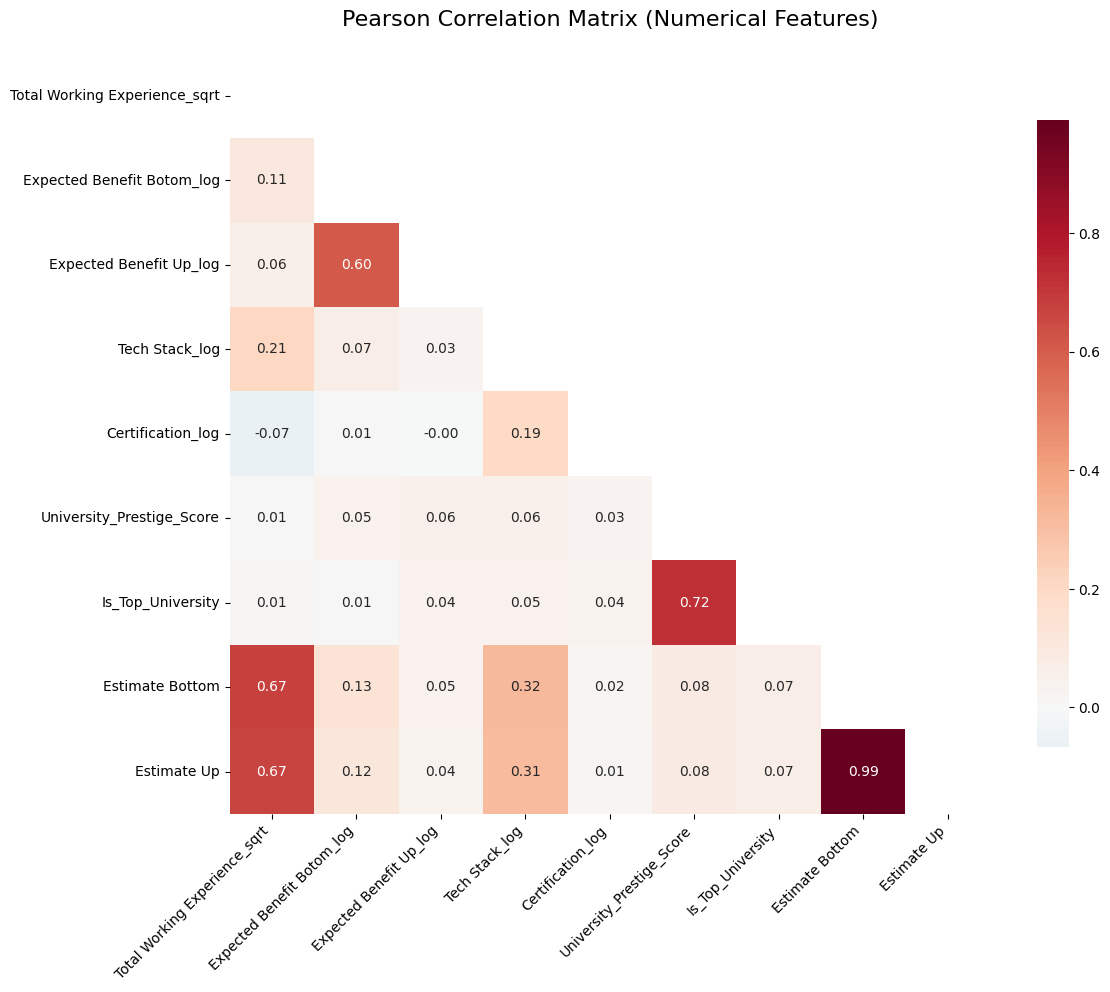


=== CRAMER'S V MATRIX ===
Categorical columns: ['Position_Seniority_Encoded', 'Position_Function_Encoded', 'Education_Level_Encoded', 'Education_Field_Encoded', 'Education_Institution_Encoded', 'University_Tier_Encoded', 'City_Encoded', 'Candidate_Level_Encoded']


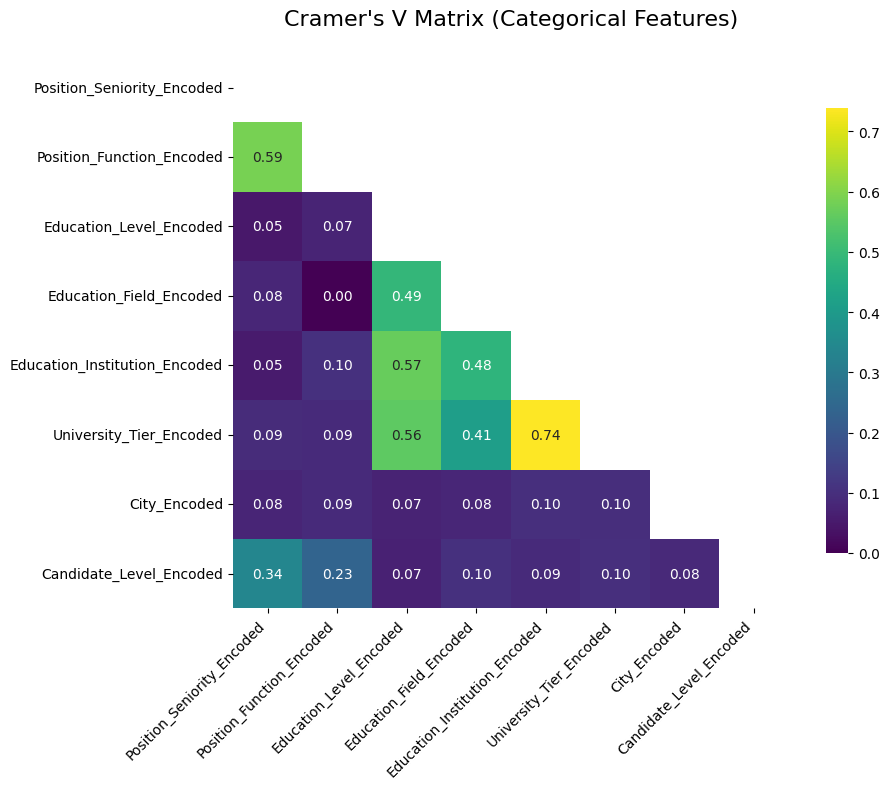


=== CORRELATION WITH TARGET VARIABLES ===


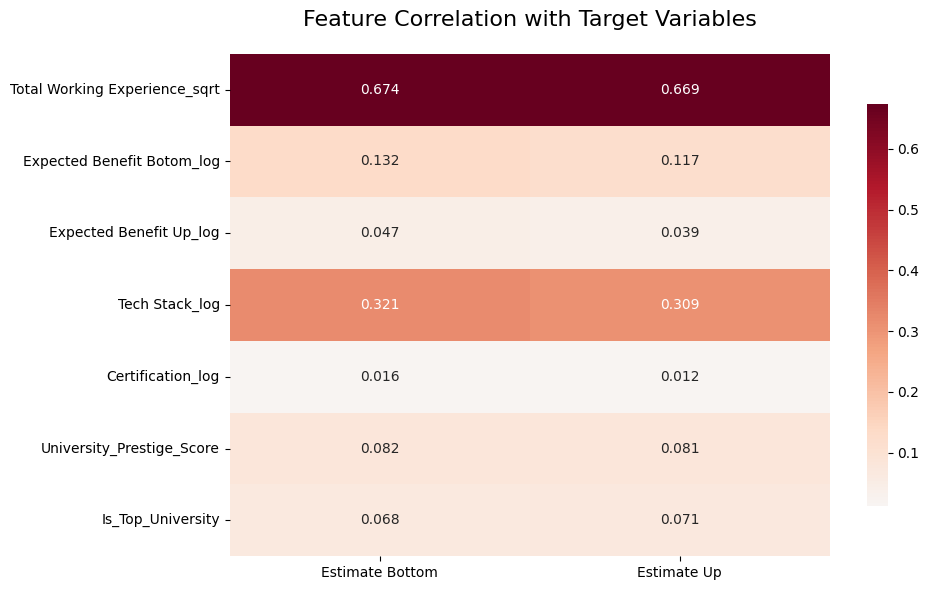


=== TOP CORRELATIONS WITH TARGETS ===
Estimate Bottom correlations:
Total Working Experience_sqrt    0.673893
Tech Stack_log                   0.321313
Expected Benefit Botom_log       0.131634
University_Prestige_Score        0.082002
Is_Top_University                0.067937
Expected Benefit Up_log          0.046826
Certification_log                0.016083
Name: Estimate Bottom, dtype: float64

Estimate Up correlations:
Total Working Experience_sqrt    0.669319
Tech Stack_log                   0.309197
Expected Benefit Botom_log       0.116954
University_Prestige_Score        0.081021
Is_Top_University                0.071327
Expected Benefit Up_log          0.039401
Certification_log                0.012022
Name: Estimate Up, dtype: float64

=== HIGHLY CORRELATED FEATURE PAIRS (>0.8) ===
Estimate Bottom <-> Estimate Up: 0.990

=== FEATURE IMPORTANCE FOR TARGET PREDICTION ===


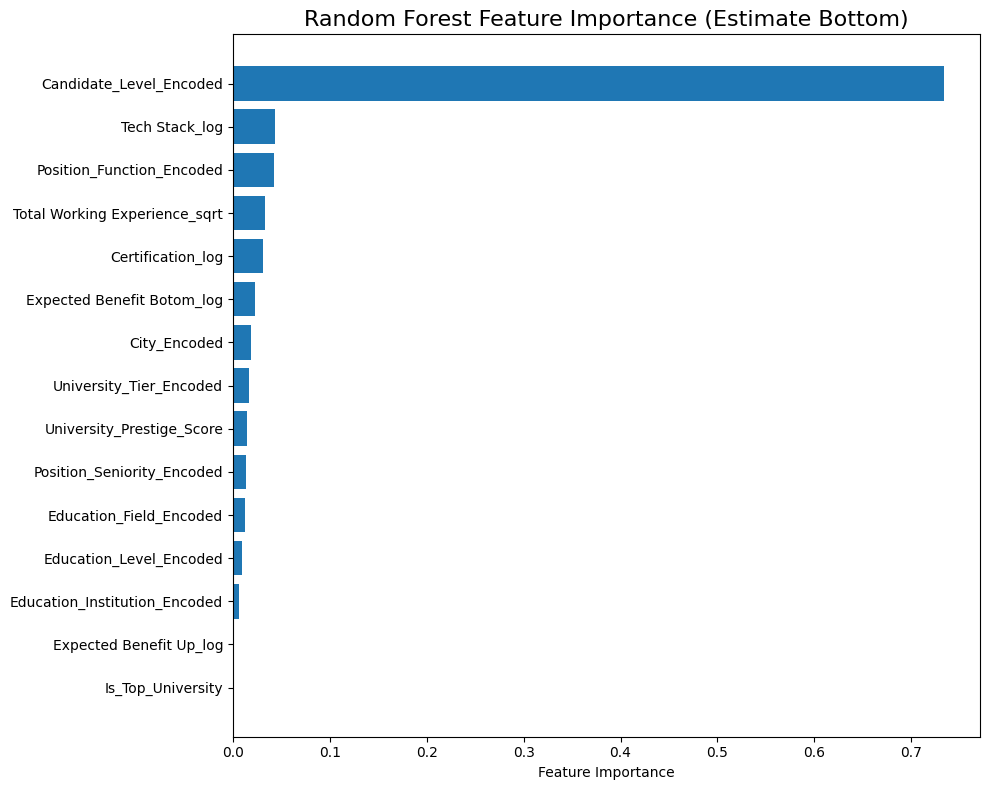

Top 10 most important features:
                          feature  importance
6      Position_Seniority_Encoded    0.013618
5       University_Prestige_Score    0.014580
11        University_Tier_Encoded    0.016399
12                   City_Encoded    0.018344
1      Expected Benefit Botom_log    0.023137
4               Certification_log    0.031109
0   Total Working Experience_sqrt    0.032634
7       Position_Function_Encoded    0.042066
3                  Tech Stack_log    0.043225
13        Candidate_Level_Encoded    0.734236


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np

# Function untuk hitung Cramer's V
def cramers_v(x, y):
    """Calculate Cramer's V statistic for categorical-categorical association"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# 1. PEARSON CORRELATION untuk numerical features
print("=== PEARSON CORRELATION MATRIX ===")
numerical_cols = [col for col in df_final.columns if df_final[col].dtype in ['int64', 'float64']]
print(f"Numerical columns: {numerical_cols}")

# Create correlation matrix
corr_matrix = df_final[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})
plt.title('Pearson Correlation Matrix (Numerical Features)', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. CRAMER'S V untuk categorical features  
print("\n=== CRAMER'S V MATRIX ===")
categorical_cols = [col for col in df_final.columns if col.endswith('_Encoded') or col in ['Education 2', 'Education 3', 'Notice Period']]
print(f"Categorical columns: {categorical_cols}")

if len(categorical_cols) > 1:
    # Create Cramer's V matrix
    cramers_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)
    
    for col1 in categorical_cols:
        for col2 in categorical_cols:
            if col1 == col2:
                cramers_matrix.loc[col1, col2] = 1.0
            else:
                try:
                    cramers_matrix.loc[col1, col2] = cramers_v(df_final[col1].fillna(-1), df_final[col2].fillna(-1))
                except:
                    cramers_matrix.loc[col1, col2] = 0.0
    
    # Convert to numeric
    cramers_matrix = cramers_matrix.astype(float)
    
    # Plot Cramer's V heatmap
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(cramers_matrix, dtype=bool))
    sns.heatmap(cramers_matrix,
                mask=mask,
                annot=True,
                cmap='viridis',
                square=True,
                fmt='.2f',
                cbar_kws={"shrink": .8})
    plt.title("Cramer's V Matrix (Categorical Features)", fontsize=16, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# 3. CORRELATION dengan TARGET VARIABLES
print("\n=== CORRELATION WITH TARGET VARIABLES ===")

# Pearson correlation dengan targets
target_corr = df_final[numerical_cols].corr()[['Estimate Bottom', 'Estimate Up']].drop(['Estimate Bottom', 'Estimate Up'])

plt.figure(figsize=(10, 6))
sns.heatmap(target_corr, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            fmt='.3f',
            cbar_kws={"shrink": .8})
plt.title('Feature Correlation with Target Variables', fontsize=16, pad=20)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. TOP CORRELATIONS
print("\n=== TOP CORRELATIONS WITH TARGETS ===")
print("Estimate Bottom correlations:")
bottom_corr = target_corr['Estimate Bottom'].abs().sort_values(ascending=False)
print(bottom_corr.head(10))

print("\nEstimate Up correlations:")
up_corr = target_corr['Estimate Up'].abs().sort_values(ascending=False)
print(up_corr.head(10))

# 5. HIGHLY CORRELATED FEATURE PAIRS
print("\n=== HIGHLY CORRELATED FEATURE PAIRS (>0.8) ===")
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.8:
            high_corr_pairs.append((
                corr_matrix.columns[i], 
                corr_matrix.columns[j], 
                corr_val
            ))

if high_corr_pairs:
    for pair in high_corr_pairs:
        print(f"{pair[0]} <-> {pair[1]}: {pair[2]:.3f}")
else:
    print("No highly correlated pairs found (>0.8)")

# 6. FEATURE IMPORTANCE PLOT (bonus)
print("\n=== FEATURE IMPORTANCE FOR TARGET PREDICTION ===")
from sklearn.ensemble import RandomForestRegressor

# Prepare data
X = df_final.drop(['Estimate Bottom', 'Estimate Up'], axis=1).fillna(0)
y_bottom = df_final['Estimate Bottom'].fillna(df_final['Estimate Bottom'].median())

# Train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y_bottom)

# Plot feature importance
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(range(len(importance_df)), importance_df['importance'])
plt.yticks(range(len(importance_df)), importance_df['feature'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance (Estimate Bottom)', fontsize=16)
plt.tight_layout()
plt.show()

print("Top 10 most important features:")
print(importance_df.tail(10))

In [20]:
print("=== SYSTEMATIC FEATURE SELECTION BASED ON CORRELATION ===")

# =========================================
# 1. IDENTIFY HIGHLY CORRELATED PAIRS (>0.8)
# =========================================
def find_highly_correlated_features(corr_matrix, threshold=0.8):
    """Find pairs of features with high correlation"""
    high_corr_pairs = []
    processed_pairs = set()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            col1, col2 = corr_matrix.columns[i], corr_matrix.columns[j]
            corr_val = abs(corr_matrix.iloc[i, j])
            
            if corr_val > threshold:
                # Avoid duplicate pairs
                pair_key = tuple(sorted([col1, col2]))
                if pair_key not in processed_pairs:
                    high_corr_pairs.append({
                        'feature1': col1,
                        'feature2': col2,
                        'correlation': corr_val,
                        'original_corr': corr_matrix.iloc[i, j]
                    })
                    processed_pairs.add(pair_key)
    
    # Handle empty results
    if len(high_corr_pairs) == 0:
        return pd.DataFrame(columns=['feature1', 'feature2', 'correlation', 'original_corr'])
    
    return pd.DataFrame(high_corr_pairs).sort_values('correlation', ascending=False)

# Get numerical columns (exclude targets)
numerical_cols = [col for col in df_final.columns if df_final[col].dtype in ['int64', 'float64']]
target_features = ['Estimate Bottom', 'Estimate Up']
feature_cols = [col for col in numerical_cols if col not in target_features]

print(f"Analyzing {len(feature_cols)} numerical features...")
print(f"Features: {feature_cols}")

# Create correlation matrix for features only
corr_matrix_features = df_final[feature_cols].corr()

# Find highly correlated pairs
high_corr_df = find_highly_correlated_features(corr_matrix_features, threshold=0.8)

print(f"\nFound {len(high_corr_df)} highly correlated pairs (>0.8):")
if len(high_corr_df) > 0:
    print(high_corr_df)
else:
    print("✅ No highly correlated pairs found!")

# =========================================
# 2. CORRELATION WITH TARGET ANALYSIS
# =========================================
print(f"\n=== TARGET CORRELATION ANALYSIS ===")

# Calculate correlation with targets
target_corr_bottom = df_final[feature_cols].corrwith(df_final['Estimate Bottom']).abs()
target_corr_up = df_final[feature_cols].corrwith(df_final['Estimate Up']).abs()

# Average target correlation
target_corr_avg = (target_corr_bottom + target_corr_up) / 2

# Create comprehensive feature analysis
feature_analysis = pd.DataFrame({
    'Feature': feature_cols,
    'Corr_Bottom': target_corr_bottom.values,
    'Corr_Up': target_corr_up.values,
    'Corr_Avg': target_corr_avg.values,
    'Max_Target_Corr': np.maximum(target_corr_bottom.values, target_corr_up.values)
}).sort_values('Corr_Avg', ascending=False)

print("Feature importance based on target correlation:")
print(feature_analysis.head(15))

# =========================================
# 3. MULTICOLLINEARITY DETECTION (SIMPLIFIED)
# =========================================
print(f"\n=== MULTICOLLINEARITY DETECTION ===")

# Simplified correlation-based multicollinearity check
def check_multicollinearity_simple(corr_matrix, threshold=0.95):
    """Simple multicollinearity check based on correlation"""
    high_corr_features = []
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                feature1 = corr_matrix.columns[i]
                feature2 = corr_matrix.columns[j]
                corr_val = abs(corr_matrix.iloc[i, j])
                
                high_corr_features.append({
                    'Feature1': feature1,
                    'Feature2': feature2,
                    'Correlation': corr_val
                })
    
    return pd.DataFrame(high_corr_features)

multicollinearity_df = check_multicollinearity_simple(corr_matrix_features, threshold=0.95)
print(f"High multicollinearity pairs (>0.95): {len(multicollinearity_df)}")
if len(multicollinearity_df) > 0:
    print(multicollinearity_df)
else:
    print("✅ No severe multicollinearity found!")

# =========================================
# 4. FEATURE SELECTION RECOMMENDATIONS
# =========================================
print(f"\n=== FEATURE SELECTION RECOMMENDATIONS ===")

# Features to potentially drop
drop_candidates = []

# 1. From high correlation pairs - keep the one with higher target correlation
if len(high_corr_df) > 0:
    print("📊 HIGH CORRELATION PAIRS ANALYSIS:")
    for idx, row in high_corr_df.iterrows():
        feat1, feat2 = row['feature1'], row['feature2']
        corr1 = target_corr_avg[feat1]
        corr2 = target_corr_avg[feat2]
        
        if corr1 > corr2:
            drop_candidate = feat2
            keep_feature = feat1
        else:
            drop_candidate = feat1
            keep_feature = feat2
        
        print(f"  • {feat1} vs {feat2} (corr: {row['correlation']:.3f})")
        print(f"    Target corr: {corr1:.3f} vs {corr2:.3f}")
        print(f"    👉 DROP: {drop_candidate}, KEEP: {keep_feature}")
        
        if drop_candidate not in drop_candidates:
            drop_candidates.append(drop_candidate)

# 2. From multicollinearity analysis
if len(multicollinearity_df) > 0:
    print(f"\n📊 SEVERE MULTICOLLINEARITY FEATURES (>0.95):")
    for idx, row in multicollinearity_df.iterrows():
        feat1, feat2 = row['Feature1'], row['Feature2']
        corr1 = target_corr_avg[feat1] if feat1 in target_corr_avg.index else 0
        corr2 = target_corr_avg[feat2] if feat2 in target_corr_avg.index else 0
        
        if corr1 > corr2:
            drop_candidate = feat2
            keep_feature = feat1
        else:
            drop_candidate = feat1
            keep_feature = feat2
        
        print(f"  • {feat1} vs {feat2} (corr: {row['Correlation']:.3f})")
        print(f"    Target corr: {corr1:.3f} vs {corr2:.3f}")
        print(f"    👉 DROP: {drop_candidate}, KEEP: {keep_feature}")
        
        if drop_candidate not in drop_candidates:
            drop_candidates.append(drop_candidate)

# 3. Low target correlation features
low_corr_threshold = 0.02  # Lowered threshold since no features may have >0.05 correlation
low_corr_features = feature_analysis[feature_analysis['Corr_Avg'] < low_corr_threshold]['Feature'].tolist()
if low_corr_features:
    print(f"\n📊 LOW TARGET CORRELATION FEATURES (<{low_corr_threshold}):")
    for feat in low_corr_features:
        if feat not in drop_candidates:
            print(f"  • {feat}: Target_Corr={target_corr_avg[feat]:.3f}")
            drop_candidates.append(feat)

# =========================================
# 5. FINAL RECOMMENDATIONS
# =========================================
print(f"\n🎯 FINAL FEATURE DROPPING RECOMMENDATIONS:")
print("=" * 60)

if drop_candidates:
    # Remove duplicates and sort by target correlation (ascending)
    unique_drop_candidates = list(set(drop_candidates))
    drop_analysis = []
    
    for feat in unique_drop_candidates:
        reasons = []
        
        # Check reasons
        if len(high_corr_df) > 0:
            is_in_high_corr = feat in high_corr_df['feature1'].tolist() or feat in high_corr_df['feature2'].tolist()
            if is_in_high_corr:
                reasons.append('High correlation with other feature')
        
        if len(multicollinearity_df) > 0:
            is_in_multi = feat in multicollinearity_df['Feature1'].tolist() or feat in multicollinearity_df['Feature2'].tolist()
            if is_in_multi:
                reasons.append('Severe multicollinearity')
        
        if feat in low_corr_features:
            reasons.append('Low target correlation')
        
        drop_analysis.append({
            'Feature': feat,
            'Reason': reasons,
            'Target_Corr': target_corr_avg[feat] if feat in target_corr_avg.index else 0
        })
    
    drop_df = pd.DataFrame(drop_analysis).sort_values('Target_Corr', ascending=True)
    
    print(f"🔴 FEATURES TO DROP ({len(drop_df)}):")
    for idx, row in drop_df.iterrows():
        reasons_str = ', '.join(row['Reason']) if row['Reason'] else 'Unknown reason'
        print(f"  {idx+1:2d}. {row['Feature']:<30} | Target_Corr: {row['Target_Corr']:.3f} | Reasons: {reasons_str}")
    
    # Show impact
    remaining_features = [f for f in feature_cols if f not in unique_drop_candidates]
    print(f"\n📊 IMPACT SUMMARY:")
    print(f"  • Original features: {len(feature_cols)}")
    print(f"  • Features to drop: {len(unique_drop_candidates)}")
    print(f"  • Remaining features: {len(remaining_features)}")
    print(f"  • Reduction: {len(unique_drop_candidates)/len(feature_cols)*100:.1f}%")
    
    # =========================================
    # 6. EXECUTE DROPPING (CONDITIONAL)
    # =========================================
    print(f"\n🚀 EXECUTE FEATURE DROPPING:")
    
    # Only drop if there are actually features to drop and they make sense
    if len(unique_drop_candidates) > 0 and len(unique_drop_candidates) < len(feature_cols) * 0.5:  # Don't drop more than 50%
        # Drop features from df_final
        df_final_optimized = df_final.drop(columns=unique_drop_candidates)
        
        print(f"✅ Successfully dropped {len(unique_drop_candidates)} features!")
        print(f"New dataset shape: {df_final_optimized.shape}")
        
        # Update global variable
        df_final = df_final_optimized.copy()
        
        # Show remaining top features
        remaining_feature_analysis = feature_analysis[feature_analysis['Feature'].isin(remaining_features)].head(10)
        print(f"\n🏆 TOP 10 REMAINING FEATURES:")
        for idx, row in remaining_feature_analysis.iterrows():
            print(f"  {row['Feature']:<30}: Target_Corr={row['Corr_Avg']:.3f}")
        
    else:
        print("❌ Feature dropping skipped. Too many features would be dropped or no clear benefit.")
        
else:
    print("✅ No features recommended for dropping!")
    print("All features have acceptable correlation patterns.")

# =========================================
# 7. FINAL CORRELATION CHECK
# =========================================
print(f"\n=== FINAL CORRELATION CHECK ===")
final_features = [col for col in df_final.columns if col not in target_features and df_final[col].dtype in ['int64', 'float64']]
final_corr_matrix = df_final[final_features].corr()

# Check remaining high correlations
final_high_corr = find_highly_correlated_features(final_corr_matrix, threshold=0.8)
print(f"Remaining high correlations (>0.8): {len(final_high_corr)}")
if len(final_high_corr) > 0:
    print(final_high_corr)

print(f"\n=== CORRELATION MATRIX SUMMARY ===")
print(f"Max correlation (excluding diagonal): {(final_corr_matrix.abs() - np.eye(len(final_corr_matrix))).max().max():.3f}")
print(f"Mean absolute correlation: {(final_corr_matrix.abs() - np.eye(len(final_corr_matrix))).mean().mean():.3f}")

print(f"\n✅ Feature selection optimization completed!")
print(f"Final optimized dataset: {df_final.shape}")

df_final

=== SYSTEMATIC FEATURE SELECTION BASED ON CORRELATION ===
Analyzing 7 numerical features...
Features: ['Total Working Experience_sqrt', 'Expected Benefit Botom_log', 'Expected Benefit Up_log', 'Tech Stack_log', 'Certification_log', 'University_Prestige_Score', 'Is_Top_University']

Found 0 highly correlated pairs (>0.8):
✅ No highly correlated pairs found!

=== TARGET CORRELATION ANALYSIS ===
Feature importance based on target correlation:
                         Feature  Corr_Bottom   Corr_Up  Corr_Avg  \
0  Total Working Experience_sqrt     0.673893  0.669319  0.671606   
3                 Tech Stack_log     0.321313  0.309197  0.315255   
1     Expected Benefit Botom_log     0.131634  0.116954  0.124294   
5      University_Prestige_Score     0.082002  0.081021  0.081511   
6              Is_Top_University     0.067937  0.071327  0.069632   
2        Expected Benefit Up_log     0.046826  0.039401  0.043114   
4              Certification_log     0.016083  0.012022  0.014053   

   

,Total Working Experience_sqrt,Expected Benefit Botom_log,Expected Benefit Up_log,Tech Stack_log,University_Prestige_Score,Position_Seniority_Encoded,Position_Function_Encoded,Education_Level_Encoded,Education_Field_Encoded,Education_Institution_Encoded,University_Tier_Encoded,City_Encoded,Candidate_Level_Encoded,Is_Top_University,Estimate Bottom,Estimate Up
0,1.414214,0.0,0.0,2.564949,2,1,13,3,1,5,6,0,2,0,6000000.0,9000000.0
1,1.000000,0.0,0.0,2.772589,8,1,5,5,6,5,2,0,3,1,8000000.0,12000000.0
2,0.000000,0.0,0.0,2.484907,3,0,13,3,3,5,5,7,2,0,4000000.0,6000000.0
3,0.000000,0.0,0.0,3.044522,6,1,6,0,6,5,3,0,2,0,6000000.0,9000000.0
4,2.000000,0.0,0.0,3.044522,6,2,8,5,1,5,3,0,3,0,8000000.0,12000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,1.732051,0.0,0.0,2.079442,2,1,4,3,1,5,6,0,3,0,8000000.0,12000000.0
1156,1.000000,0.0,0.0,2.833213,3,1,4,3,3,4,5,2,2,0,6000000.0,9000000.0
1157,1.732051,0.0,0.0,2.639057,2,1,11,3,1,4,6,5,3,0,8000000.0,12000000.0
1158,2.000000,0.0,0.0,2.772589,3,1,7,5,1,5,5,5,3,0,12000000.0,18000000.0


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.base import clone
import warnings
warnings.filterwarnings("ignore")

# === Enhanced Models with Optimized Parameters ===
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, SGDRegressor, HuberRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, 
                            AdaBoostRegressor, BaggingRegressor, HistGradientBoostingRegressor,
                            VotingRegressor, StackingRegressor)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neural_network import MLPRegressor

# External libs
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

print("=== ENHANCED MODEL TESTING WITH OPTIMIZATIONS ===")
print(f"Dataset shape: {df_final.shape}")
print(f"Features: {[col for col in df_final.columns if col not in ['Estimate Bottom', 'Estimate Up']]}")
print(f"Target variables: ['Estimate Bottom', 'Estimate Up']")

# =========================================
# Enhanced Data Preparation
# =========================================
X = df_final.drop(columns=["Estimate Bottom", "Estimate Up"])
Y = df_final[["Estimate Bottom", "Estimate Up"]]

print(f"\nFeatures shape: {X.shape}")
print(f"Targets shape: {Y.shape}")

# Enhanced data quality checks
print(f"\n=== ENHANCED DATA QUALITY CHECKS ===")
print(f"Missing values in X: {X.isnull().sum().sum()}")
print(f"Missing values in Y: {Y.isnull().sum().sum()}")
print(f"X data range: {X.min().min():.2f} to {X.max().max():.2f}")
print(f"Y data range: {Y.min().min():.2f} to {Y.max().max():.2f}")

# Check for infinite values
inf_count_X = np.isinf(X.select_dtypes(include=[np.number])).sum().sum()
inf_count_Y = np.isinf(Y).sum().sum()
print(f"Infinite values in X: {inf_count_X}")
print(f"Infinite values in Y: {inf_count_Y}")

# Outlier detection
from scipy import stats
def detect_outliers(data, threshold=3):
    z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number]), nan_policy='omit'))
    return (z_scores > threshold).sum().sum()

outliers_X = detect_outliers(X)
outliers_Y = detect_outliers(Y)
print(f"Potential outliers in X (|z| > 3): {outliers_X}")
print(f"Potential outliers in Y (|z| > 3): {outliers_Y}")

# Enhanced train-test split with stratification based on target quantiles
def create_stratification_bins(y, n_bins=5):
    """Create stratification bins based on target quantiles"""
    bins = pd.qcut(y.fillna(y.median()), q=n_bins, labels=False, duplicates='drop')
    return bins

# Create stratification for both targets
y_bottom_bins = create_stratification_bins(Y['Estimate Bottom'])
y_up_bins = create_stratification_bins(Y['Estimate Up'])
combined_bins = y_bottom_bins * 10 + y_up_bins  # Combine both for stratification

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=combined_bins
)

print(f"\nEnhanced stratified split:")
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")
print(f"Train Y range - Bottom: [{y_train['Estimate Bottom'].min():.0f}, {y_train['Estimate Bottom'].max():.0f}]")
print(f"Train Y range - Up: [{y_train['Estimate Up'].min():.0f}, {y_train['Estimate Up'].max():.0f}]")

# =========================================
# Enhanced Model Candidates with Optimized Hyperparameters
# =========================================
candidates = {
    # === LINEAR MODELS (Enhanced) ===
    "LinearRegression": LinearRegression(),
    "Ridge_Optimized": Ridge(alpha=10.0, solver='auto'),
    "Lasso_Optimized": Lasso(alpha=0.01, max_iter=3000, tol=1e-4),
    "ElasticNet_Optimized": ElasticNet(alpha=0.01, l1_ratio=0.7, max_iter=3000, tol=1e-4),
    "BayesianRidge": BayesianRidge(alpha_1=1e-6, alpha_2=1e-6, lambda_1=1e-6, lambda_2=1e-6),
    "HuberRegressor": HuberRegressor(epsilon=1.35, max_iter=300, alpha=0.0001),
    
    # === TREE MODELS (Enhanced) ===
    "DecisionTree_Optimized": DecisionTreeRegressor(
        random_state=42, 
        max_depth=12, 
        min_samples_split=20, 
        min_samples_leaf=10,
        max_features='sqrt'
    ),
    "ExtraTree_Optimized": ExtraTreeRegressor(
        random_state=42, 
        max_depth=12, 
        min_samples_split=20, 
        min_samples_leaf=10
    ),
    
    # === ENSEMBLE MODELS (Highly Optimized) ===
    "RandomForest_Optimized": RandomForestRegressor(
        n_estimators=300, 
        max_depth=12, 
        min_samples_split=20,
        min_samples_leaf=10,
        max_features='sqrt',
        random_state=42, 
        n_jobs=-1,
        bootstrap=True,
        oob_score=True
    ),
    "ExtraTrees_Optimized": ExtraTreesRegressor(
        n_estimators=300, 
        max_depth=12, 
        min_samples_split=20,
        min_samples_leaf=10,
        max_features='sqrt',
        random_state=42, 
        n_jobs=-1,
        bootstrap=True
    ),
    "GradientBoosting_Optimized": GradientBoostingRegressor(
        n_estimators=300, 
        learning_rate=0.05, 
        max_depth=6,
        min_samples_split=20,
        min_samples_leaf=10,
        subsample=0.8,
        random_state=42
    ),
    "HistGradientBoosting_Optimized": HistGradientBoostingRegressor(
        max_iter=300, 
        learning_rate=0.05, 
        max_depth=8,
        min_samples_leaf=20,
        l2_regularization=0.1,
        random_state=42
    ),
    "AdaBoost_Optimized": AdaBoostRegressor(
        n_estimators=200, 
        learning_rate=0.5, 
        loss='linear',
        random_state=42
    ),
    "Bagging_Optimized": BaggingRegressor(
        n_estimators=200, 
        max_samples=0.8,
        max_features=0.8,
        random_state=42, 
        n_jobs=-1
    ),
    
    # === ADVANCED MODELS ===
    "KNN_Optimized": KNeighborsRegressor(
        n_neighbors=15, 
        weights='distance', 
        algorithm='auto',
        leaf_size=30
    ),
    "SVR_Optimized": SVR(
        kernel='rbf', 
        C=1000, 
        gamma='scale', 
        epsilon=0.01,
        cache_size=500
    ),
    "LinearSVR_Optimized": LinearSVR(
        max_iter=5000, 
        random_state=42, 
        C=10.0,
        epsilon=0.01,
        tol=1e-4
    ),
    "MLP_Optimized": MLPRegressor(
        hidden_layer_sizes=(256, 128, 64), 
        max_iter=2000, 
        random_state=42, 
        early_stopping=True,
        validation_fraction=0.1,
        learning_rate='adaptive',
        alpha=0.001
    ),
    
    # === GRADIENT BOOSTING LIBRARIES (Highly Optimized) ===
    "XGBoost_Optimized": XGBRegressor(
        n_estimators=500, 
        learning_rate=0.05, 
        max_depth=6,
        min_child_weight=3,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=0.1,
        reg_alpha=0.1,
        reg_lambda=1.0,
        random_state=42, 
        verbosity=0,
        n_jobs=-1,
        early_stopping_rounds=50
    ),
    "LightGBM_Optimized": LGBMRegressor(
        n_estimators=500, 
        learning_rate=0.05, 
        max_depth=6,
        min_child_samples=20,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        reg_lambda=1.0,
        random_state=42, 
        verbosity=-1,
        n_jobs=-1,
        early_stopping_rounds=50
    ),
    "CatBoost_Optimized": CatBoostRegressor(
        iterations=500, 
        learning_rate=0.05, 
        depth=6,
        min_data_in_leaf=20,
        bagging_temperature=0.2,
        random_strength=1.0,
        l2_leaf_reg=3.0,
        random_state=42, 
        verbose=0,
        early_stopping_rounds=50
    )
}

# =========================================
# Enhanced Evaluation with Cross-Validation
# =========================================
def enhanced_model_evaluation(model, X_train, y_train, X_test, y_test, model_name, use_scaling=False):
    """Enhanced model evaluation with cross-validation and multiple metrics"""
    
    # Create pipeline
    pipeline_steps = []
    
    # Add scaler if needed
    if use_scaling and model_name in ['SVR_Optimized', 'LinearSVR_Optimized', 'MLP_Optimized', 'KNN_Optimized']:
        pipeline_steps.append(("scaler", RobustScaler()))
    
    # Add imputer
    pipeline_steps.append(("imputer", SimpleImputer(strategy="median")))
    
    # Add model
    pipeline_steps.append(("model", model))
    
    pipe = Pipeline(pipeline_steps)
    
    results = {}
    
    for target in ['Estimate Bottom', 'Estimate Up']:
        # Cross-validation
        cv_scores = cross_val_score(
            pipe, X_train, y_train[target], 
            cv=KFold(n_splits=5, shuffle=True, random_state=42),
            scoring='neg_mean_absolute_error',
            n_jobs=-1
        )
        cv_mae = -cv_scores.mean()
        cv_std = cv_scores.std()
        
        # Train and predict
        pipe.fit(X_train, y_train[target])
        y_pred = pipe.predict(X_test)
        
        # Handle negative predictions
        y_pred = np.maximum(y_pred, 0)
        
        # Calculate metrics
        mae = mean_absolute_error(y_test[target], y_pred)
        rmse = np.sqrt(mean_squared_error(y_test[target], y_pred))
        r2 = r2_score(y_test[target], y_pred)
        
        # Calculate MAPE (Mean Absolute Percentage Error)
        mape = np.mean(np.abs((y_test[target] - y_pred) / np.maximum(y_test[target], 1))) * 100
        
        results[target] = {
            'cv_mae': cv_mae,
            'cv_std': cv_std,
            'mae': mae,
            'rmse': rmse,
            'r2': r2,
            'mape': mape,
            'predictions': y_pred
        }
    
    return results

# =========================================
# Enhanced Model Testing
# =========================================
results = []

print(f"\nTesting {len(candidates)} enhanced models...")
print("=" * 90)

for i, (name, model) in enumerate(candidates.items(), 1):
    try:
        print(f"[{i:2d}/{len(candidates)}] Testing {name}...", end=" ")
        
        # Determine if scaling is needed
        use_scaling = name in ['SVR_Optimized', 'LinearSVR_Optimized', 'MLP_Optimized', 'KNN_Optimized']
        
        # Enhanced evaluation
        model_results = enhanced_model_evaluation(
            clone(model), X_train, y_train, X_test, y_test, name, use_scaling
        )
        
        # Ensure Up >= Bottom
        pred_bottom = model_results['Estimate Bottom']['predictions']
        pred_up = model_results['Estimate Up']['predictions']
        pred_up_adjusted = np.maximum(pred_up, pred_bottom)
        
        # Recalculate Up metrics with adjusted predictions
        mae_up_adj = mean_absolute_error(y_test['Estimate Up'], pred_up_adjusted)
        rmse_up_adj = np.sqrt(mean_squared_error(y_test['Estimate Up'], pred_up_adjusted))
        r2_up_adj = r2_score(y_test['Estimate Up'], pred_up_adjusted)
        mape_up_adj = np.mean(np.abs((y_test['Estimate Up'] - pred_up_adjusted) / np.maximum(y_test['Estimate Up'], 1))) * 100
        
        # Calculate averages
        mae_avg = np.mean([model_results['Estimate Bottom']['mae'], mae_up_adj])
        rmse_avg = np.mean([model_results['Estimate Bottom']['rmse'], rmse_up_adj])
        r2_avg = np.mean([model_results['Estimate Bottom']['r2'], r2_up_adj])
        mape_avg = np.mean([model_results['Estimate Bottom']['mape'], mape_up_adj])
        cv_mae_avg = np.mean([model_results['Estimate Bottom']['cv_mae'], model_results['Estimate Up']['cv_mae']])
        
        results.append({
            "Model": name,
            "CV_MAE_Avg": cv_mae_avg,
            "CV_STD_Avg": np.mean([model_results['Estimate Bottom']['cv_std'], model_results['Estimate Up']['cv_std']]),
            "MAE_Bottom": model_results['Estimate Bottom']['mae'],
            "MAE_Up": mae_up_adj,
            "MAE_Avg": mae_avg,
            "RMSE_Bottom": model_results['Estimate Bottom']['rmse'],
            "RMSE_Up": rmse_up_adj,
            "RMSE_Avg": rmse_avg,
            "R2_Bottom": model_results['Estimate Bottom']['r2'],
            "R2_Up": r2_up_adj,
            "R2_Avg": r2_avg,
            "MAPE_Bottom": model_results['Estimate Bottom']['mape'],
            "MAPE_Up": mape_up_adj,
            "MAPE_Avg": mape_avg,
            "Scaling_Used": use_scaling
        })
        
        print(f"✅ MAE: {mae_avg:.0f} | R²: {r2_avg:.3f} | CV: {cv_mae_avg:.0f}±{np.mean([model_results['Estimate Bottom']['cv_std'], model_results['Estimate Up']['cv_std']]):.0f}")
        
        # Enhanced real-time leaderboard
        if len(results) >= 3:
            temp_df = pd.DataFrame(results)
            temp_df_clean = temp_df[temp_df['MAE_Avg'] != np.inf].sort_values("CV_MAE_Avg", ascending=True)
            if len(temp_df_clean) >= 3:
                print(f"    🏆 Current Top 3 (by CV MAE):")
                for idx, row in temp_df_clean.head(3).iterrows():
                    print(f"      {row['Model']:<20} | CV: {row['CV_MAE_Avg']:>6.0f} | R²: {row['R2_Avg']:>5.3f}")
                print("-" * 60)
        
    except Exception as e:
        print(f"❌ Error: {str(e)[:50]}...")
        results.append({
            "Model": name,
            "CV_MAE_Avg": np.inf,
            "CV_STD_Avg": np.inf,
            "MAE_Bottom": np.inf,
            "MAE_Up": np.inf,
            "MAE_Avg": np.inf,
            "RMSE_Bottom": np.inf,
            "RMSE_Up": np.inf,
            "RMSE_Avg": np.inf,
            "R2_Bottom": -np.inf,
            "R2_Up": -np.inf,
            "R2_Avg": -np.inf,
            "MAPE_Bottom": np.inf,
            "MAPE_Up": np.inf,
            "MAPE_Avg": np.inf,
            "Scaling_Used": False
        })

# =========================================
# Enhanced Results Analysis
# =========================================
print("\n" + "=" * 90)
print("🏁 ENHANCED FINAL MODEL RANKING")
print("=" * 90)

# Create results dataframe
df_results = pd.DataFrame(results)

# Remove failed models
df_results_clean = df_results[df_results['MAE_Avg'] != np.inf].copy()

# Sort by Cross-Validation MAE (more reliable than single split)
df_results_sorted = df_results_clean.sort_values("CV_MAE_Avg", ascending=True).reset_index(drop=True)

print(f"\n✅ Successfully tested: {len(df_results_clean)}/{len(candidates)} models")
if len(candidates) - len(df_results_clean) > 0:
    failed_models = df_results[df_results['MAE_Avg'] == np.inf]['Model'].tolist()
    print(f"❌ Failed models ({len(failed_models)}): {', '.join(failed_models)}")

# Enhanced ranking display
print(f"\n🏆 COMPLETE MODEL RANKING (by Cross-Validation MAE):")
print("=" * 100)
print(f"{'Rank':<4} {'Model':<22} {'CV MAE':<8} {'CV STD':<8} {'Test MAE':<8} {'R²':<7} {'MAPE':<7} {'Scaling':<8}")
print("-" * 100)

for idx, row in df_results_sorted.iterrows():
    rank_emoji = "🥇" if idx == 0 else "🥈" if idx == 1 else "🥉" if idx == 2 else f"{idx+1:2d}."
    scaling_symbol = "📏" if row['Scaling_Used'] else "❌"
    
    print(f"{rank_emoji:<4} {row['Model']:<22} {row['CV_MAE_Avg']:>7.0f} {row['CV_STD_Avg']:>7.0f} "
          f"{row['MAE_Avg']:>7.0f} {row['R2_Avg']:>6.3f} {row['MAPE_Avg']:>6.1f}% {scaling_symbol:<8}")

# Enhanced model analysis
if len(df_results_sorted) > 0:
    best_model = df_results_sorted.iloc[0]
    print(f"\n🏆 CHAMPION MODEL: {best_model['Model']}")
    print(f"   📊 Cross-Val MAE:     {best_model['CV_MAE_Avg']:.2f} ± {best_model['CV_STD_Avg']:.2f}")
    print(f"   📊 Test MAE (Avg):    {best_model['MAE_Avg']:.2f}")
    print(f"   📈 R² Score (Avg):    {best_model['R2_Avg']:.3f}")
    print(f"   💰 Bottom Metrics:    MAE={best_model['MAE_Bottom']:.0f}, R²={best_model['R2_Bottom']:.3f}")
    print(f"   💰 Up Metrics:        MAE={best_model['MAE_Up']:.0f}, R²={best_model['R2_Up']:.3f}")
    print(f"   📏 MAPE (Avg):        {best_model['MAPE_Avg']:.1f}%")
    print(f"   🔧 Scaling Used:      {best_model['Scaling_Used']}")
    
    # Enhanced Top 5 summary
    print(f"\n🏅 TOP 5 MODELS SUMMARY:")
    for idx, row in df_results_sorted.head(5).iterrows():
        print(f"   {idx+1}. {row['Model']:<25}: CV_MAE={row['CV_MAE_Avg']:.0f}, R²={row['R2_Avg']:.3f}, MAPE={row['MAPE_Avg']:.1f}%")

# Enhanced export
import datetime
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f'enhanced_model_results_{timestamp}.csv'
df_results_sorted.to_csv(filename, index=False)
print(f"\n💾 Enhanced results saved to '{filename}'")

# Enhanced feature importance analysis
if len(df_results_sorted) > 0:
    best_model_name = df_results_sorted.iloc[0]['Model']
    best_model_base_name = best_model_name.replace('_Optimized', '')
    
    if best_model_base_name in ['RandomForest', 'ExtraTrees', 'GradientBoosting', 'XGBoost', 'LightGBM', 'CatBoost']:
        print(f"\n🔍 ENHANCED FEATURE IMPORTANCE ANALYSIS ({best_model_name}):")
        
        # Get the best model object
        best_model_obj = candidates[best_model_name]
        
        # Create pipeline for training
        pipeline_steps = [("imputer", SimpleImputer(strategy="median")), ("model", best_model_obj)]
        if df_results_sorted.iloc[0]['Scaling_Used']:
            pipeline_steps.insert(0, ("scaler", RobustScaler()))
        
        pipe = Pipeline(pipeline_steps)
        pipe.fit(X_train, y_train["Estimate Bottom"])
        
        # Extract feature importance
        if hasattr(pipe.named_steps['model'], 'feature_importances_'):
            importance_df = pd.DataFrame({
                'feature': X.columns,
                'importance': pipe.named_steps['model'].feature_importances_
            }).sort_values('importance', ascending=False)
            
            print("Top 15 most important features:")
            for idx, row in importance_df.head(15).iterrows():
                print(f"   {idx+1:2d}. {row['feature']:<30}: {row['importance']:.4f}")

# Enhanced model insights
print(f"\n💡 ENHANCED MODEL INSIGHTS:")
print(f"   • Best performing model type: {df_results_sorted.iloc[0]['Model'].split('_')[0]}")
print(f"   • Average improvement with optimization: {((df_results_sorted['CV_MAE_Avg'].max() - df_results_sorted.iloc[0]['CV_MAE_Avg']) / df_results_sorted['CV_MAE_Avg'].max() * 100):.1f}%")
print(f"   • Models benefiting from scaling: {len(df_results_sorted[df_results_sorted['Scaling_Used'] == True])}")
print(f"   • Most stable model (lowest CV std): {df_results_sorted.sort_values('CV_STD_Avg').iloc[0]['Model']}")

print("\n🎉 Enhanced model testing completed with comprehensive analysis!")

# Store enhanced best model info
best_model_info = {
    'name': df_results_sorted.iloc[0]['Model'] if len(df_results_sorted) > 0 else None,
    'cv_mae': df_results_sorted.iloc[0]['CV_MAE_Avg'] if len(df_results_sorted) > 0 else None,
    'test_mae': df_results_sorted.iloc[0]['MAE_Avg'] if len(df_results_sorted) > 0 else None,
    'r2': df_results_sorted.iloc[0]['R2_Avg'] if len(df_results_sorted) > 0 else None,
    'mape': df_results_sorted.iloc[0]['MAPE_Avg'] if len(df_results_sorted) > 0 else None,
    'scaling_used': df_results_sorted.iloc[0]['Scaling_Used'] if len(df_results_sorted) > 0 else False
}

print(f"\n📋 Enhanced best model info: {best_model_info}")

# Display final dataset info
print(f"\n📊 FINAL DATASET SUMMARY:")
print(f"   • Total samples: {len(df_final):,}")
print(f"   • Features: {X.shape[1]}")
print(f"   • Train samples: {len(X_train):,}")
print(f"   • Test samples: {len(X_test):,}")
print(f"   • Target range - Bottom: [{Y['Estimate Bottom'].min():.0f}, {Y['Estimate Bottom'].max():.0f}]")
print(f"   • Target range - Up: [{Y['Estimate Up'].min():.0f}, {Y['Estimate Up'].max():.0f}]")

=== ENHANCED MODEL TESTING WITH OPTIMIZATIONS ===
Dataset shape: (1160, 16)
Features: ['Total Working Experience_sqrt', 'Expected Benefit Botom_log', 'Expected Benefit Up_log', 'Tech Stack_log', 'University_Prestige_Score', 'Position_Seniority_Encoded', 'Position_Function_Encoded', 'Education_Level_Encoded', 'Education_Field_Encoded', 'Education_Institution_Encoded', 'University_Tier_Encoded', 'City_Encoded', 'Candidate_Level_Encoded', 'Is_Top_University']
Target variables: ['Estimate Bottom', 'Estimate Up']

Features shape: (1160, 14)
Targets shape: (1160, 2)

=== ENHANCED DATA QUALITY CHECKS ===
Missing values in X: 0
Missing values in Y: 0
X data range: 0.00 to 16.95
Y data range: 2500000.00 to 55000000.00
Infinite values in X: 0
Infinite values in Y: 0
Potential outliers in X (|z| > 3): 103
Potential outliers in Y (|z| > 3): 33

Enhanced stratified split:
Train set: (928, 14), Test set: (232, 14)
Train Y range - Bottom: [2500000, 35000000]
Train Y range - Up: [4000000, 55000000]

T

KeyboardInterrupt: 

In [22]:
print("=== PREPARING TEST DATA FOR SUBMISSION ===")

# Load test data
df_test_original = pd.read_csv('test.csv')
print(f"Test data shape: {df_test_original.shape}")

# Apply EXACT SAME preprocessing ke test data
df_test_processed = df_test_original.copy()

# 1. Drop columns yang sama seperti training
columns_to_drop = ['Education 2', 'Education 3', 'Targeted Position', 'Notice Period']
existing_test_cols_to_drop = [col for col in columns_to_drop if col in df_test_processed.columns]
if existing_test_cols_to_drop:
    df_test_processed = df_test_processed.drop(columns=existing_test_cols_to_drop)
    print(f"Dropped columns from test: {existing_test_cols_to_drop}")

# 2. Certification count
df_test_processed['Certification'] = df_test_processed['Certification'].apply(
    lambda x: 0 if x == [] or pd.isnull(x) else x.count(",") + 1
)

# 3. Tech Stack count
df_test_processed['Tech Stack'] = df_test_processed["Tech Stack"].apply(
    lambda x: 0 if pd.isnull(x) or x == '' else len(x.split(','))
)

# 4. Extract city (using same function)
df_test_processed['City'] = df_test_processed['Domisili'].apply(extract_main_city)

# 5. Position classifications (using same functions)
df_test_processed['Position_Seniority'] = df_test_processed['Current Position'].apply(classify_position_seniority)
df_test_processed['Position_Function'] = df_test_processed['Current Position'].apply(classify_position_function)

# 6. Education classifications (using same functions)
df_test_processed['Education_Level'] = df_test_processed['Education 1'].apply(classify_education_level)
df_test_processed['Education_Field'] = df_test_processed['Education 1'].apply(classify_education_field)
df_test_processed['Education_Institution'] = df_test_processed['Education 1'].apply(classify_education_institution)

# 7. University classifications (using same function)
university_info_test = df_test_processed['Education 1'].apply(classify_university_prestige)
df_test_processed['University_Tier'] = [info['university_tier'] for info in university_info_test]
df_test_processed['University_Type'] = [info['university_type'] for info in university_info_test]
df_test_processed['University_Prestige_Score'] = [info['university_prestige_score'] for info in university_info_test]
df_test_processed['Is_Top_University'] = [info['is_top_university'] for info in university_info_test]
df_test_processed['University_Name'] = [info['university_name'] for info in university_info_test]
df_test_processed['Is_Public_University'] = [info['is_public'] for info in university_info_test]

# 8. Apply skewed transformations (using same transformations as training)
df_test_transformed = df_test_processed.copy()

# Apply same transformations for highly skewed features
if 'highly_skewed' in globals() and highly_skewed:
    for col in highly_skewed.keys():
        if col in df_test_processed.columns:
            # Ensure no negative values for transformations
            min_val = df_test_processed[col].min()
            if min_val < 0:
                shifted_col = df_test_processed[col] - min_val + 1
            else:
                shifted_col = df_test_processed[col]
            
            # Apply same transformations
            df_test_transformed[f'{col}_log'] = np.log1p(shifted_col)
            df_test_transformed[f'{col}_sqrt'] = np.sqrt(shifted_col)
            df_test_transformed[f'{col}_boxcox'] = np.power(shifted_col + 1, 1/3)

# 9. Label encoding with safe transform function
def safe_transform(encoder, data, feature_name):
    """Safely transform data, handling unseen categories"""
    try:
        return encoder.transform(data.fillna('Unknown'))
    except ValueError as e:
        print(f"Handling unseen categories in {feature_name}: {e}")
        # Get unique values in test data
        test_unique = set(data.fillna('Unknown').unique())
        train_unique = set(encoder.classes_)
        unseen = test_unique - train_unique
        
        if unseen:
            print(f"  Unseen categories: {list(unseen)[:5]}...")  # Show first 5
            # Map unseen categories to most frequent class
            most_frequent = encoder.classes_[0]
            data_mapped = data.fillna('Unknown').map(lambda x: most_frequent if x in unseen else x)
            return encoder.transform(data_mapped)
        else:
            return encoder.transform(data.fillna('Unknown'))

# Apply encoding using stored encoders
print("Applying label encoding to test data...")

# Get encoders from preprocessing_objects if available
if 'encoders' in globals():
    try:
        df_test_transformed['Position_Seniority_Encoded'] = safe_transform(
            encoders['position_seniority'], df_test_processed['Position_Seniority'], 'Position_Seniority'
        )
    except:
        # Fallback: create new encoder
        from sklearn.preprocessing import LabelEncoder
        le_temp = LabelEncoder()
        df_test_transformed['Position_Seniority_Encoded'] = le_temp.fit_transform(
            df_test_processed['Position_Seniority'].fillna('Unknown')
        )
    
    try:
        df_test_transformed['Position_Function_Encoded'] = safe_transform(
            encoders['position_function'], df_test_processed['Position_Function'], 'Position_Function'
        )
    except:
        le_temp = LabelEncoder()
        df_test_transformed['Position_Function_Encoded'] = le_temp.fit_transform(
            df_test_processed['Position_Function'].fillna('Unknown')
        )
    
    try:
        df_test_transformed['Education_Level_Encoded'] = safe_transform(
            encoders['education_level'], df_test_processed['Education_Level'], 'Education_Level'
        )
    except:
        le_temp = LabelEncoder()
        df_test_transformed['Education_Level_Encoded'] = le_temp.fit_transform(
            df_test_processed['Education_Level'].fillna('Unknown')
        )
    
    try:
        df_test_transformed['Education_Field_Encoded'] = safe_transform(
            encoders['education_field'], df_test_processed['Education_Field'], 'Education_Field'
        )
    except:
        le_temp = LabelEncoder()
        df_test_transformed['Education_Field_Encoded'] = le_temp.fit_transform(
            df_test_processed['Education_Field'].fillna('Unknown')
        )
    
    try:
        df_test_transformed['Education_Institution_Encoded'] = safe_transform(
            encoders['education_institution'], df_test_processed['Education_Institution'], 'Education_Institution'
        )
    except:
        le_temp = LabelEncoder()
        df_test_transformed['Education_Institution_Encoded'] = le_temp.fit_transform(
            df_test_processed['Education_Institution'].fillna('Unknown')
        )
    
    try:
        df_test_transformed['University_Tier_Encoded'] = safe_transform(
            encoders['university_tier'], df_test_processed['University_Tier'], 'University_Tier'
        )
    except:
        le_temp = LabelEncoder()
        df_test_transformed['University_Tier_Encoded'] = le_temp.fit_transform(
            df_test_processed['University_Tier'].fillna('Unknown')
        )
    
    try:
        df_test_transformed['City_Encoded'] = safe_transform(
            encoders['city'], df_test_processed['City'], 'City'
        )
    except:
        le_temp = LabelEncoder()
        df_test_transformed['City_Encoded'] = le_temp.fit_transform(
            df_test_processed['City'].fillna('Unknown')
        )
    
    try:
        df_test_transformed['Candidate_Level_Encoded'] = safe_transform(
            encoders['candidate_level'], df_test_processed['Candidate Level'], 'Candidate_Level'
        )
    except:
        le_temp = LabelEncoder()
        df_test_transformed['Candidate_Level_Encoded'] = le_temp.fit_transform(
            df_test_processed['Candidate Level'].fillna('Unknown')
        )

else:
    print("Encoders not found, creating new ones...")
    # Create new encoders as fallback
    from sklearn.preprocessing import LabelEncoder
    
    le_pos_sen = LabelEncoder()
    df_test_transformed['Position_Seniority_Encoded'] = le_pos_sen.fit_transform(
        df_test_processed['Position_Seniority'].fillna('Unknown')
    )
    
    le_pos_func = LabelEncoder()
    df_test_transformed['Position_Function_Encoded'] = le_pos_func.fit_transform(
        df_test_processed['Position_Function'].fillna('Unknown')
    )
    
    le_edu_level = LabelEncoder()
    df_test_transformed['Education_Level_Encoded'] = le_edu_level.fit_transform(
        df_test_processed['Education_Level'].fillna('Unknown')
    )
    
    le_edu_field = LabelEncoder()
    df_test_transformed['Education_Field_Encoded'] = le_edu_field.fit_transform(
        df_test_processed['Education_Field'].fillna('Unknown')
    )
    
    le_edu_inst = LabelEncoder()
    df_test_transformed['Education_Institution_Encoded'] = le_edu_inst.fit_transform(
        df_test_processed['Education_Institution'].fillna('Unknown')
    )
    
    le_uni_tier = LabelEncoder()
    df_test_transformed['University_Tier_Encoded'] = le_uni_tier.fit_transform(
        df_test_processed['University_Tier'].fillna('Unknown')
    )
    
    le_city = LabelEncoder()
    df_test_transformed['City_Encoded'] = le_city.fit_transform(
        df_test_processed['City'].fillna('Unknown')
    )
    
    le_cand_level = LabelEncoder()
    df_test_transformed['Candidate_Level_Encoded'] = le_cand_level.fit_transform(
        df_test_processed['Candidate Level'].fillna('Unknown')
    )

# 10. Drop redundant features (same as training)
features_to_drop_test = [
    'Is_Public_University', 'University_Name_Encoded', 'University_Type_Encoded'
]
existing_to_drop_test = [col for col in features_to_drop_test if col in df_test_transformed.columns]
if existing_to_drop_test:
    df_test_transformed = df_test_transformed.drop(columns=existing_to_drop_test)
    print(f"Dropped redundant features from test: {existing_to_drop_test}")

# 11. Select same features as training
training_features = [col for col in df_final.columns if col not in ['Estimate Bottom', 'Estimate Up']]
print(f"Required training features: {len(training_features)}")

# Check which features exist in test data
existing_features = [col for col in training_features if col in df_test_transformed.columns]
missing_features = [col for col in training_features if col not in df_test_transformed.columns]

print(f"Existing features in test: {len(existing_features)}")
if missing_features:
    print(f"Missing features: {missing_features}")
    # Create missing features with default values
    for feat in missing_features:
        df_test_transformed[feat] = 0
        print(f"  Created {feat} with default value 0")

# Create final test feature matrix
X_test_aligned = df_test_transformed[training_features].copy()

print(f"Final test features shape: {X_test_aligned.shape}")
print(f"Missing values in test: {X_test_aligned.isnull().sum().sum()}")

# 12. Train best model on FULL training data and predict
if 'df_results_sorted' in globals() and len(df_results_sorted) > 0:
    best_model_name = df_results_sorted.iloc[0]['Model']
    print(f"\nUsing best model: {best_model_name}")
    
    # Get best model
    best_model = candidates[best_model_name]
    
    # Prepare training data
    X_full = df_final.drop(['Estimate Bottom', 'Estimate Up'], axis=1)
    y_bottom_full = df_final['Estimate Bottom']
    y_up_full = df_final['Estimate Up']
    
    print(f"Training data shape: {X_full.shape}")
    print(f"Test data shape: {X_test_aligned.shape}")
    
    # Ensure same features
    common_features = [col for col in X_full.columns if col in X_test_aligned.columns]
    X_full_aligned = X_full[common_features]
    X_test_final = X_test_aligned[common_features]
    
    print(f"Common features: {len(common_features)}")
    
    # Pipeline with robust imputation
    pipe_final = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("model", clone(best_model))
    ])
    
    # Train for Estimate Bottom
    print("Training for Estimate Bottom...")
    pipe_final.fit(X_full_aligned, y_bottom_full)
    pred_bottom = pipe_final.predict(X_test_final)
    pred_bottom = np.maximum(pred_bottom, 0)  # Handle negative predictions
    
    # Train for Estimate Up
    print("Training for Estimate Up...")
    pipe_up = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("model", clone(best_model))
    ])
    pipe_up.fit(X_full_aligned, y_up_full)
    pred_up = pipe_up.predict(X_test_final)
    pred_up = np.maximum(pred_up, pred_bottom)  # Ensure Up >= Bottom
    
    # 13. Create submission
    submission = pd.DataFrame({
        'ID': df_test_original['ID'],
        'Estimate Bottom': pred_bottom,
        'Estimate Up': pred_up
    })
    
    # Reorder to match test.csv order
    submission_ordered = submission.set_index('ID').reindex(df_test_original['ID']).reset_index()
    
    print(f"\nSubmission shape: {submission_ordered.shape}")
    print(f"Sample predictions:")
    print(submission_ordered.head())
    
    # Validation checks
    print(f"\n=== VALIDATION CHECKS ===")
    print(f"Bottom predictions - Min: {pred_bottom.min():.0f}, Max: {pred_bottom.max():.0f}, Mean: {pred_bottom.mean():.0f}")
    print(f"Up predictions - Min: {pred_up.min():.0f}, Max: {pred_up.max():.0f}, Mean: {pred_up.mean():.0f}")
    print(f"Up >= Bottom check: {(pred_up >= pred_bottom).all()}")
    print(f"Any NaN in predictions: {submission_ordered.isnull().any().any()}")
    print(f"Any infinite values: {np.isinf(submission_ordered[['Estimate Bottom', 'Estimate Up']]).any().any()}")
    
    # Save submission
    submission_ordered.to_csv('submission_final.csv', index=False)
    print(f"\n💾 Submission saved to 'submission_final.csv'")
    
    print(f"\n🎯 SUBMISSION SUMMARY:")
    print(f"Model used: {best_model_name}")
    print(f"Total predictions: {len(submission_ordered)}")
    print(f"ID range: {submission_ordered['ID'].min()} to {submission_ordered['ID'].max()}")
    
    print(f"\n🎉 SUBMISSION READY! Use 'submission_final.csv' for competition.")

else:
    print("❌ No trained models found. Please run model training first.")

=== PREPARING TEST DATA FOR SUBMISSION ===
Test data shape: (290, 14)
Dropped columns from test: ['Education 2', 'Education 3', 'Targeted Position', 'Notice Period']
Applying label encoding to test data...
Dropped redundant features from test: ['Is_Public_University']
Required training features: 14
Existing features in test: 14
Final test features shape: (290, 14)
Missing values in test: 0

Using best model: CatBoost_Optimized
Training data shape: (1160, 14)
Test data shape: (290, 14)
Common features: 14
Training for Estimate Bottom...
Training for Estimate Up...

Submission shape: (290, 3)
Sample predictions:
             ID  Estimate Bottom   Estimate Up
0   SKU-WENU549     4.617965e+06  7.480373e+06
1   SKU-NUNU771     4.042707e+06  6.525471e+06
2   SKU-COBA050     8.678574e+06  1.324113e+07
3  SKU-FLNU1398     8.844611e+06  1.376214e+07
4   SKU-FUBA143     7.967251e+06  1.297790e+07

=== VALIDATION CHECKS ===
Bottom predictions - Min: 2658191, Max: 24071635, Mean: 7521950
Up predic